# Tarea semanal 9 
## Destefano, Martin 

### Parte 1 - Diseño de filtros

Se necesita eliminar las interferencias de una señal electrocardiográfica (ECG) que fue registrada a una frecuencia de muestreo de 1 kHz. Para ello se propone la siguiente plantilla de diseño:

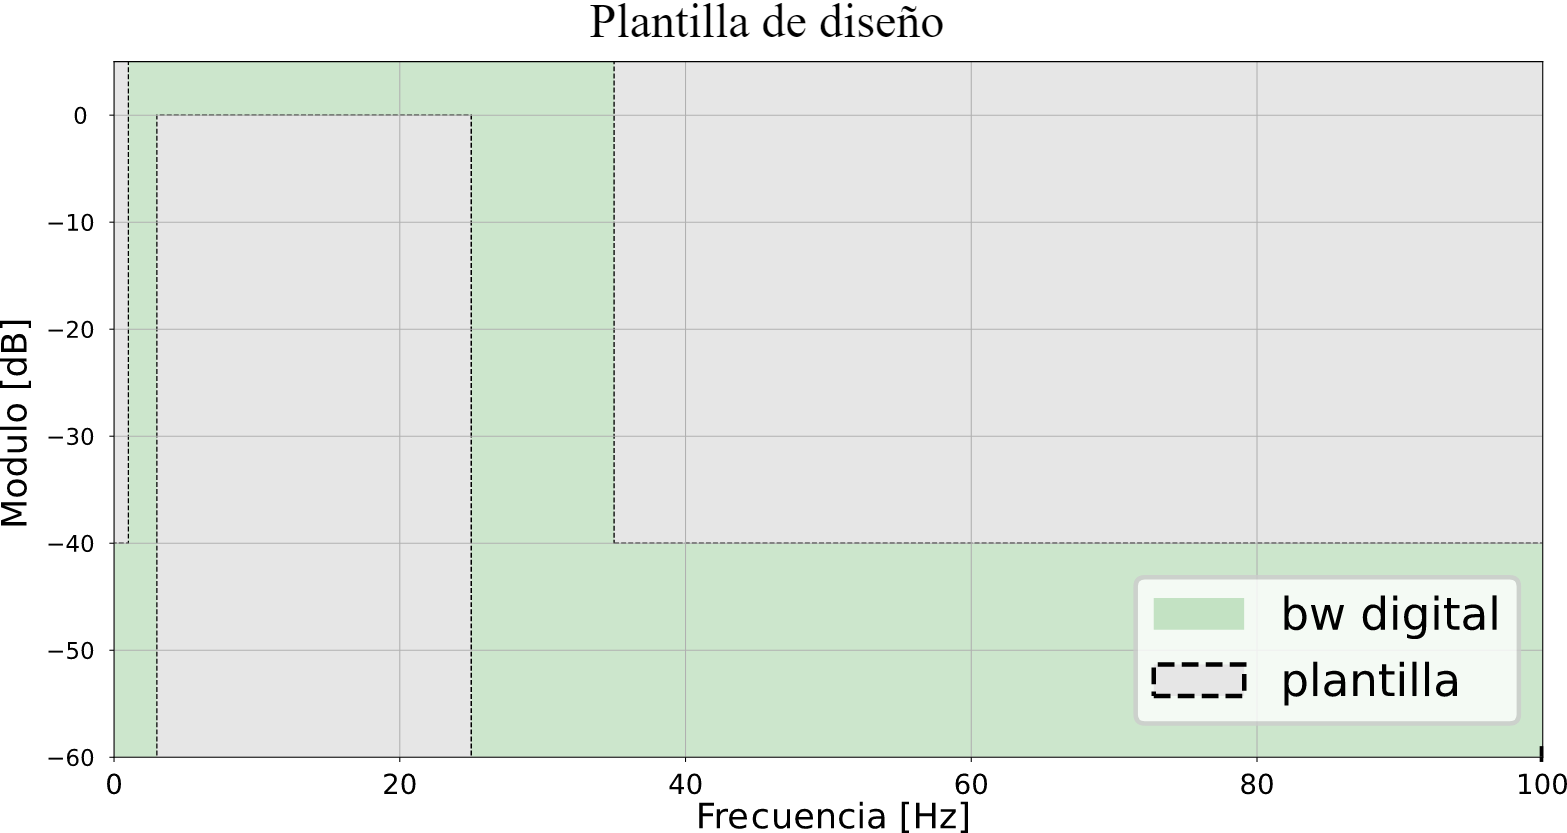

y se pide diseñar dos filtros: uno IIR y otro FIR que cumplan con la plantilla, utilizando alguno de los métodos estudiados. Mostrar la respuesta en frecuencia, para ambos filtros, de:

a) módulo,

b) fase

c) retardo

d) y respuesta al impulso.

Utilizare tres tipos de herramientas de diseño: 

- Pyfda
- Script de Python
- Matlab

Los diseños de PyFDA y Matlab son comparativos, unicamente voy a filtrar la señal ECG por el FIR que me da Matlab (ademas de los calculados mediante funciones), para comprobar como se comporta con los coeficientes que arroja el la herramienta. 

### FIR 
##### Configuracion: 
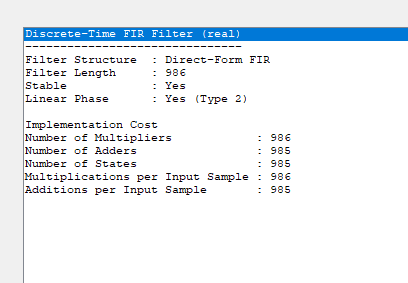
##### Modulo: 
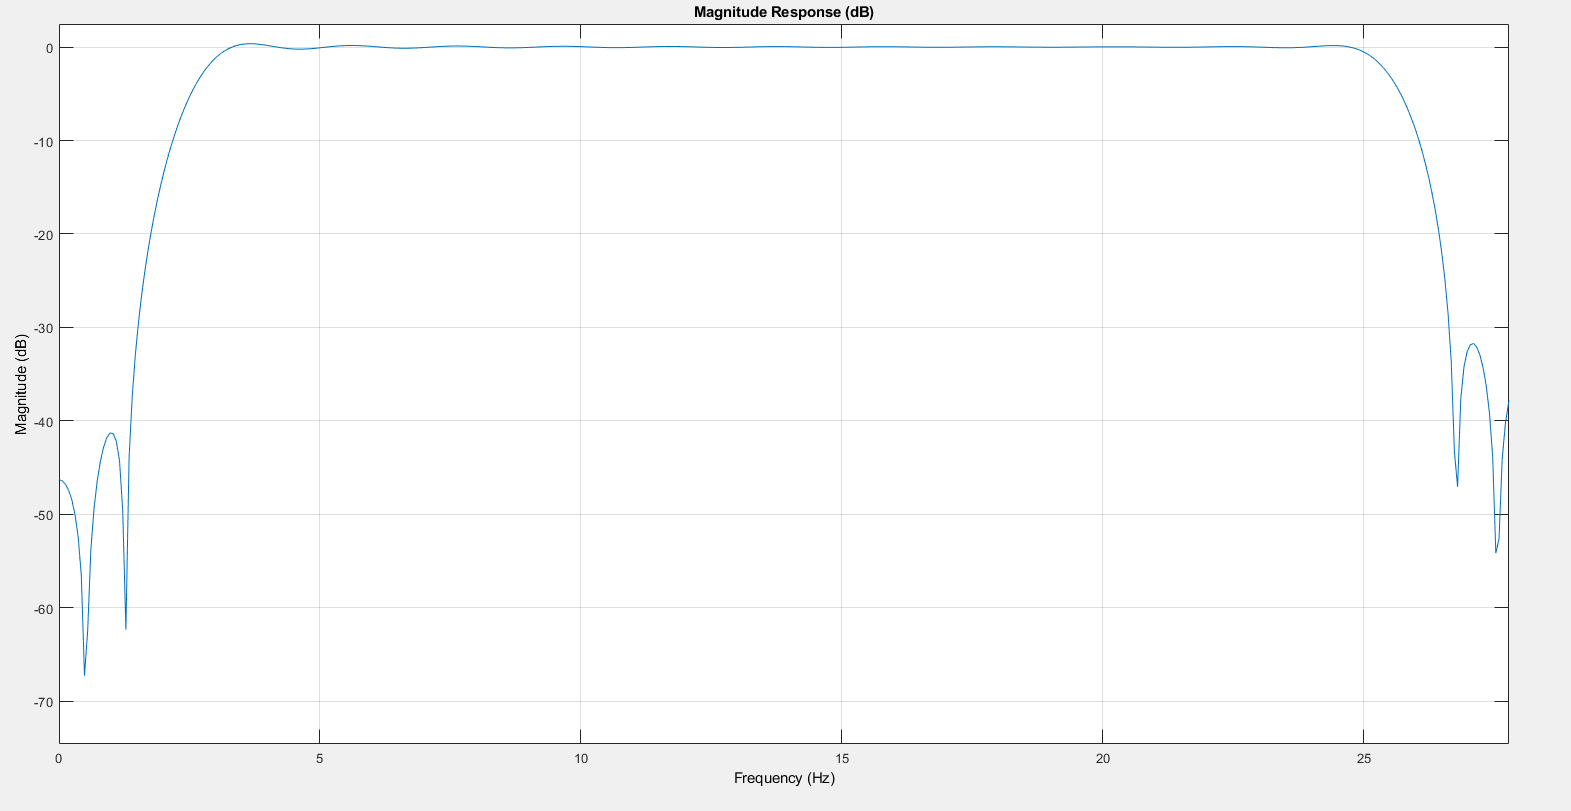
Buscamos un FIR lo mas equirriple posible, caracteristica importante en el diseño de este tipo de filtros. 
##### Fase: 
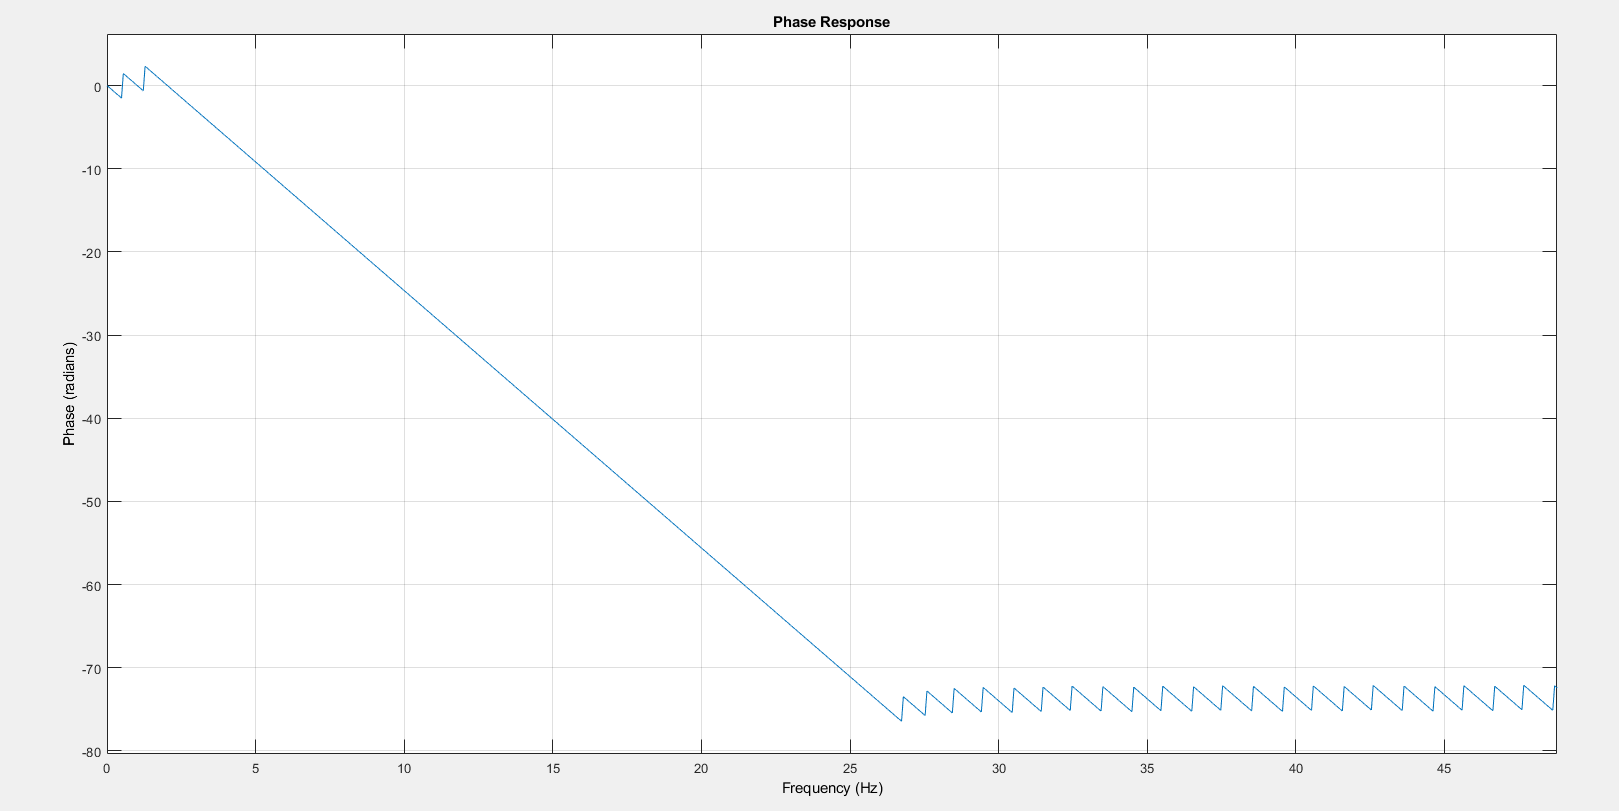
##### Retardo: 
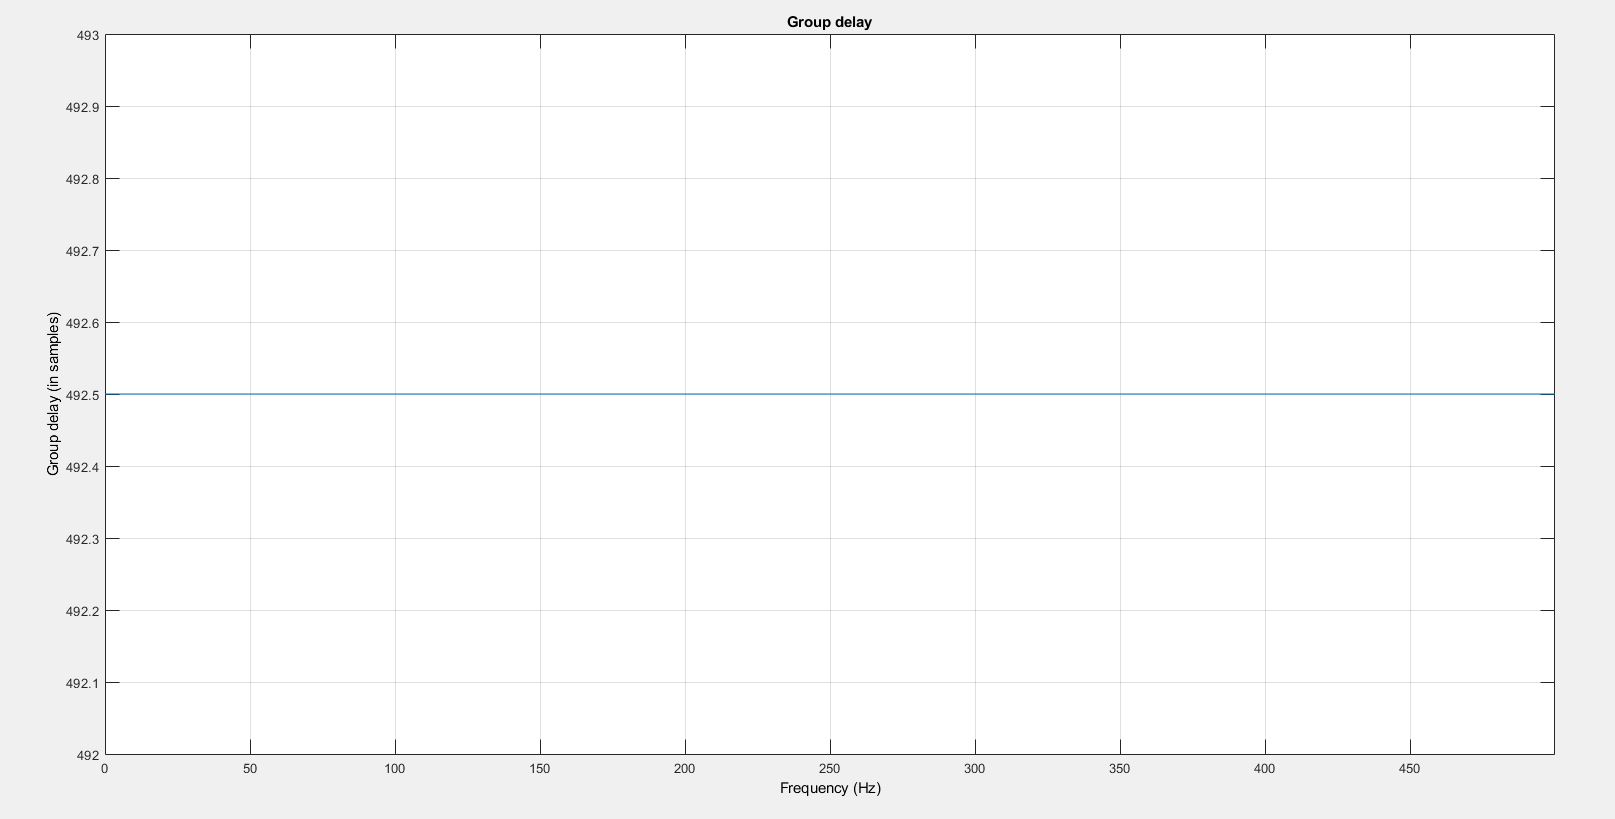
##### Respuesta al impulso: 
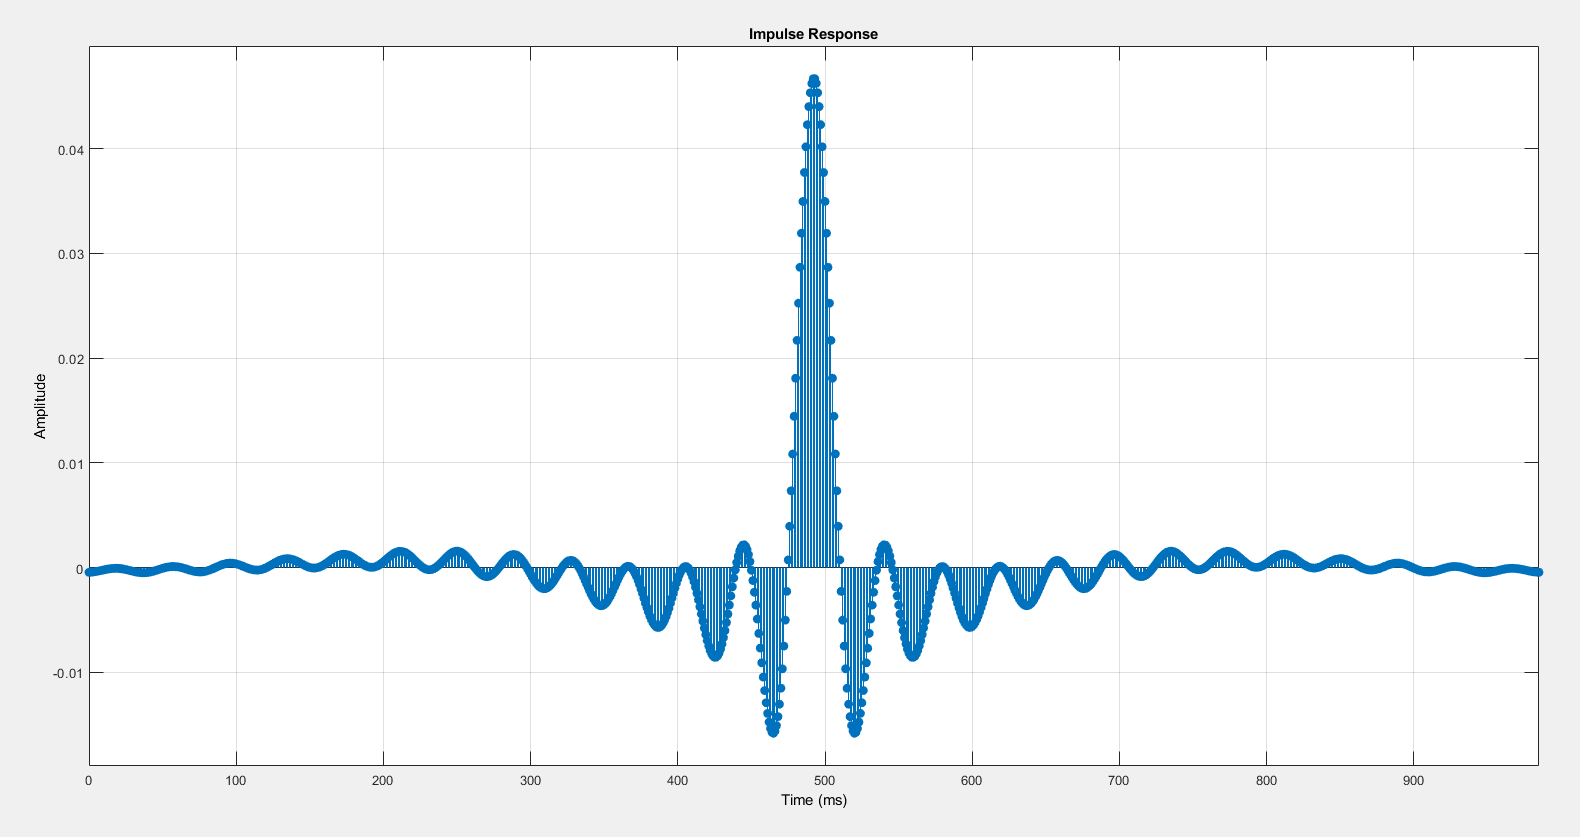



### IIR 
##### Configuracion: 
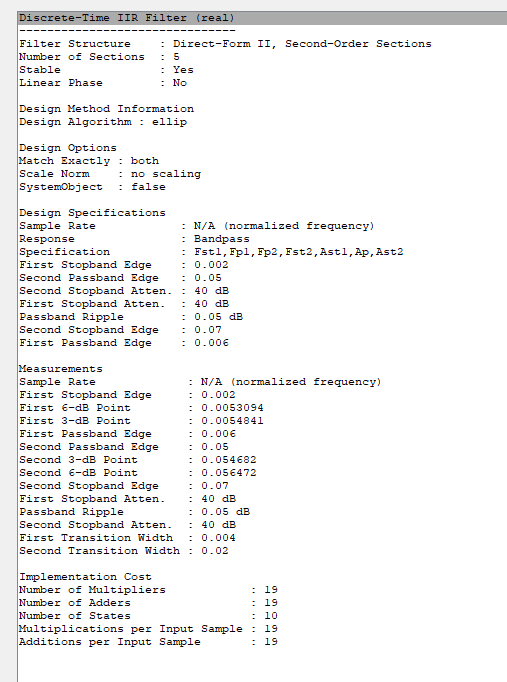
##### Modulo: 
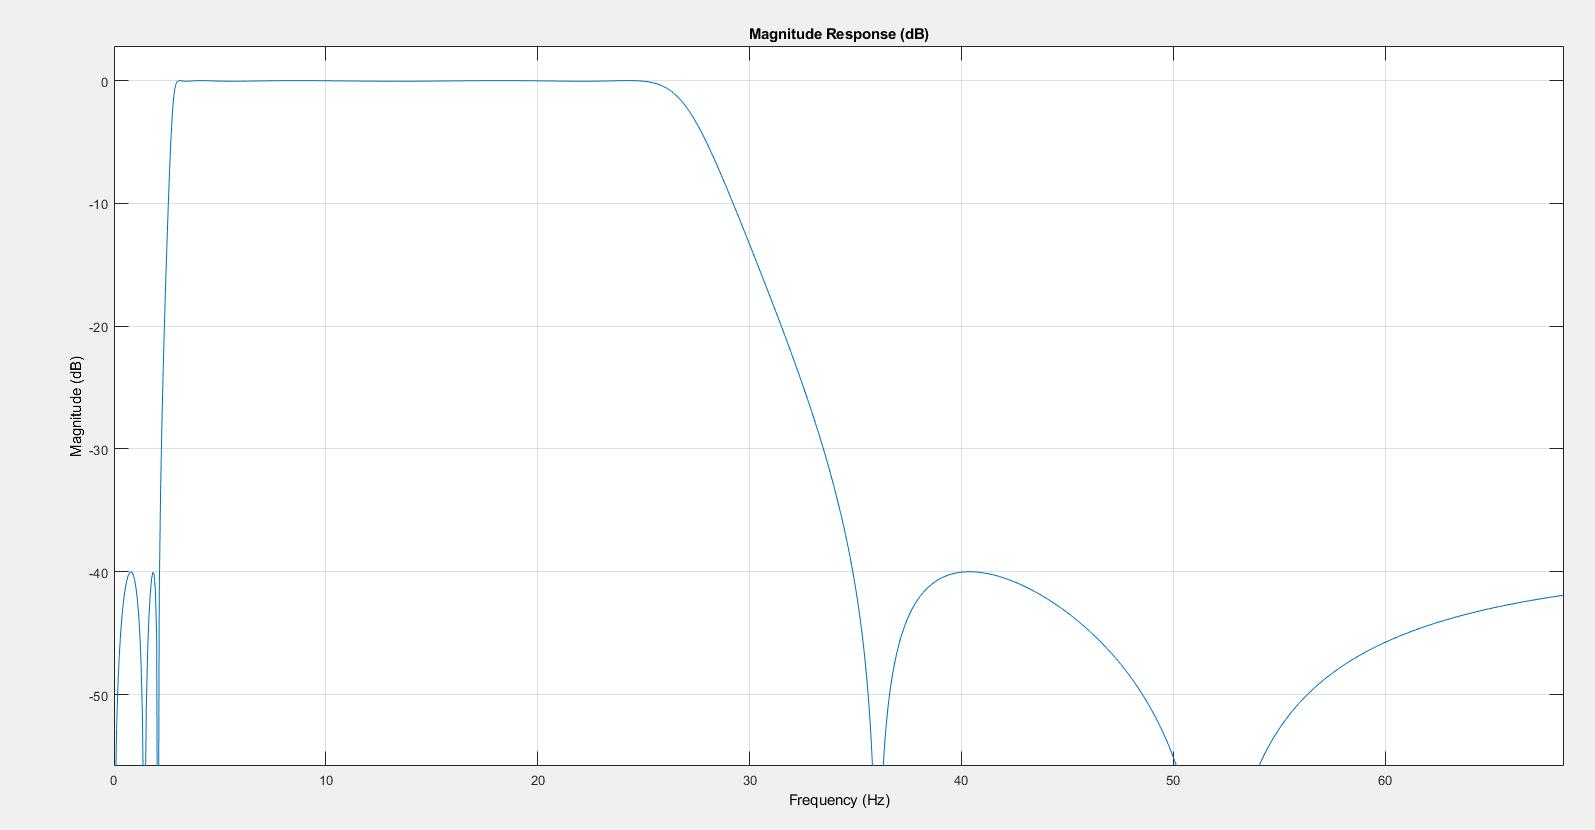
##### Fase: 
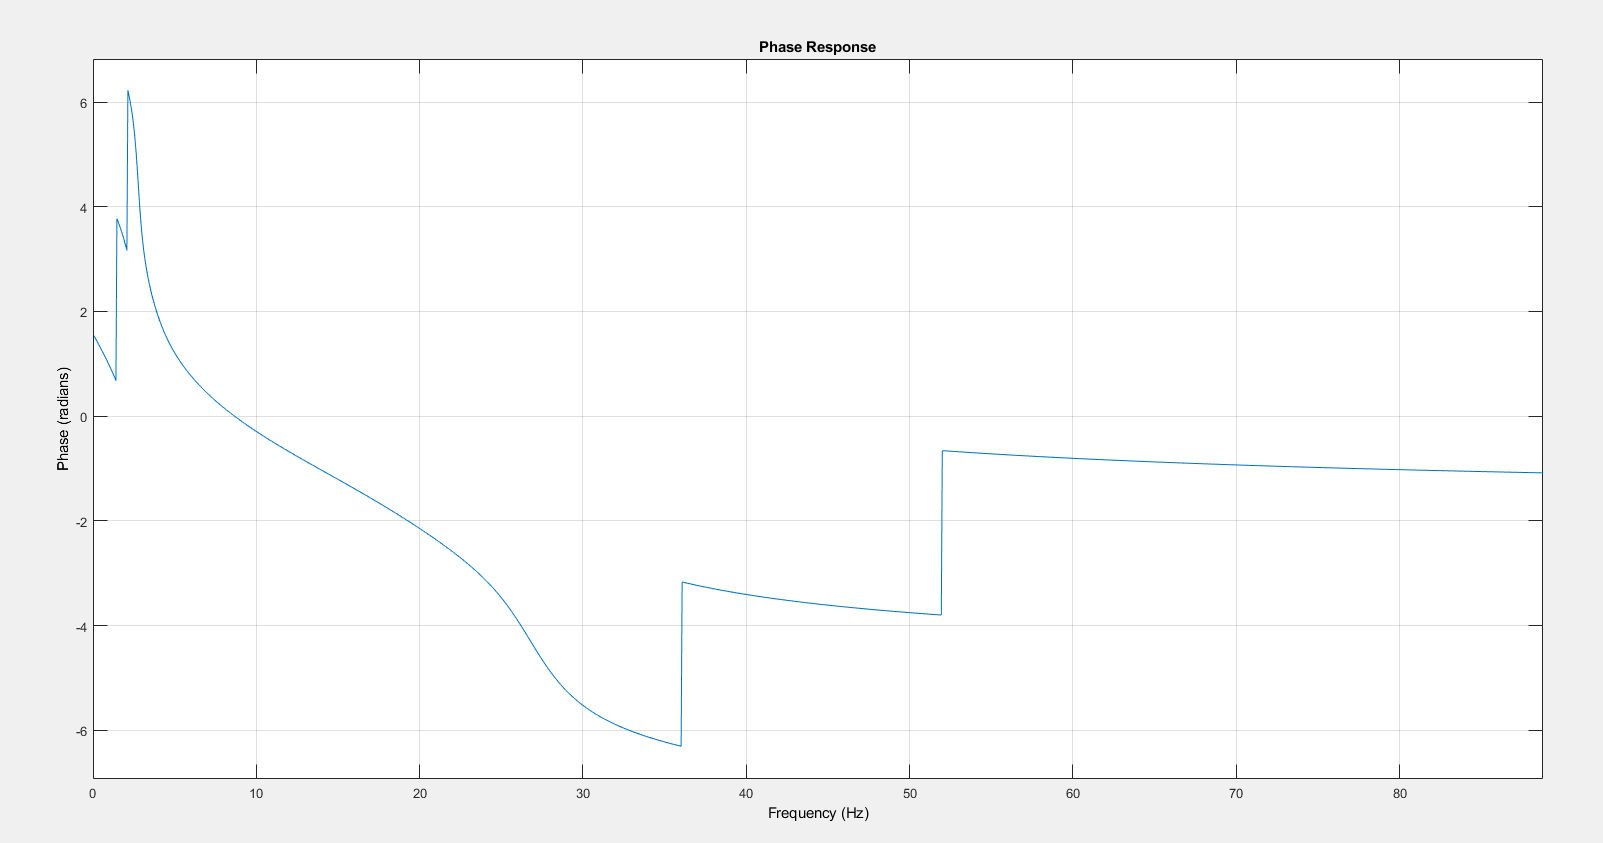
##### Retardo: 
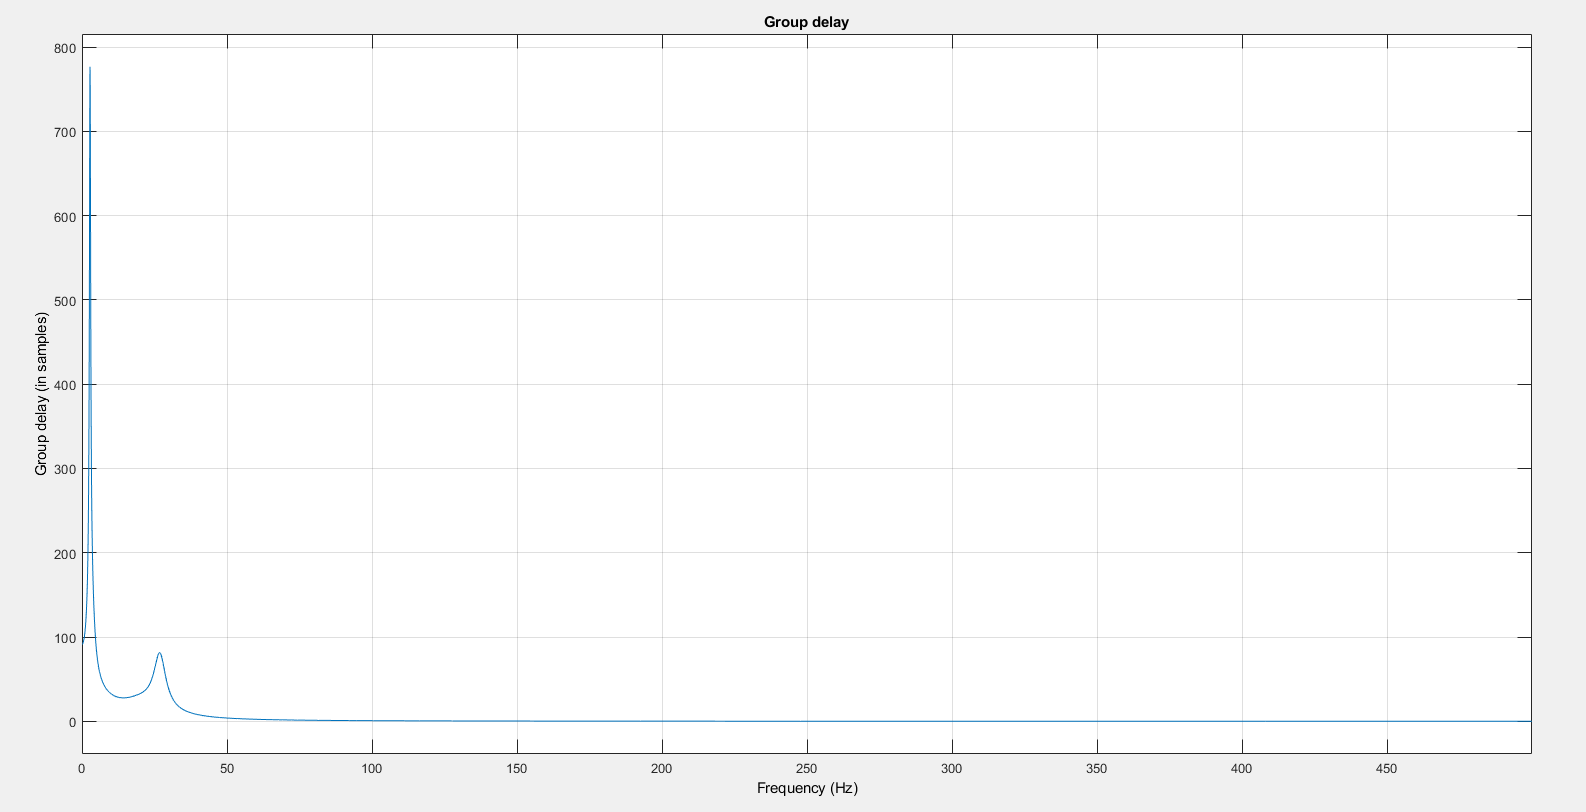
##### Respuesta al impulso: 
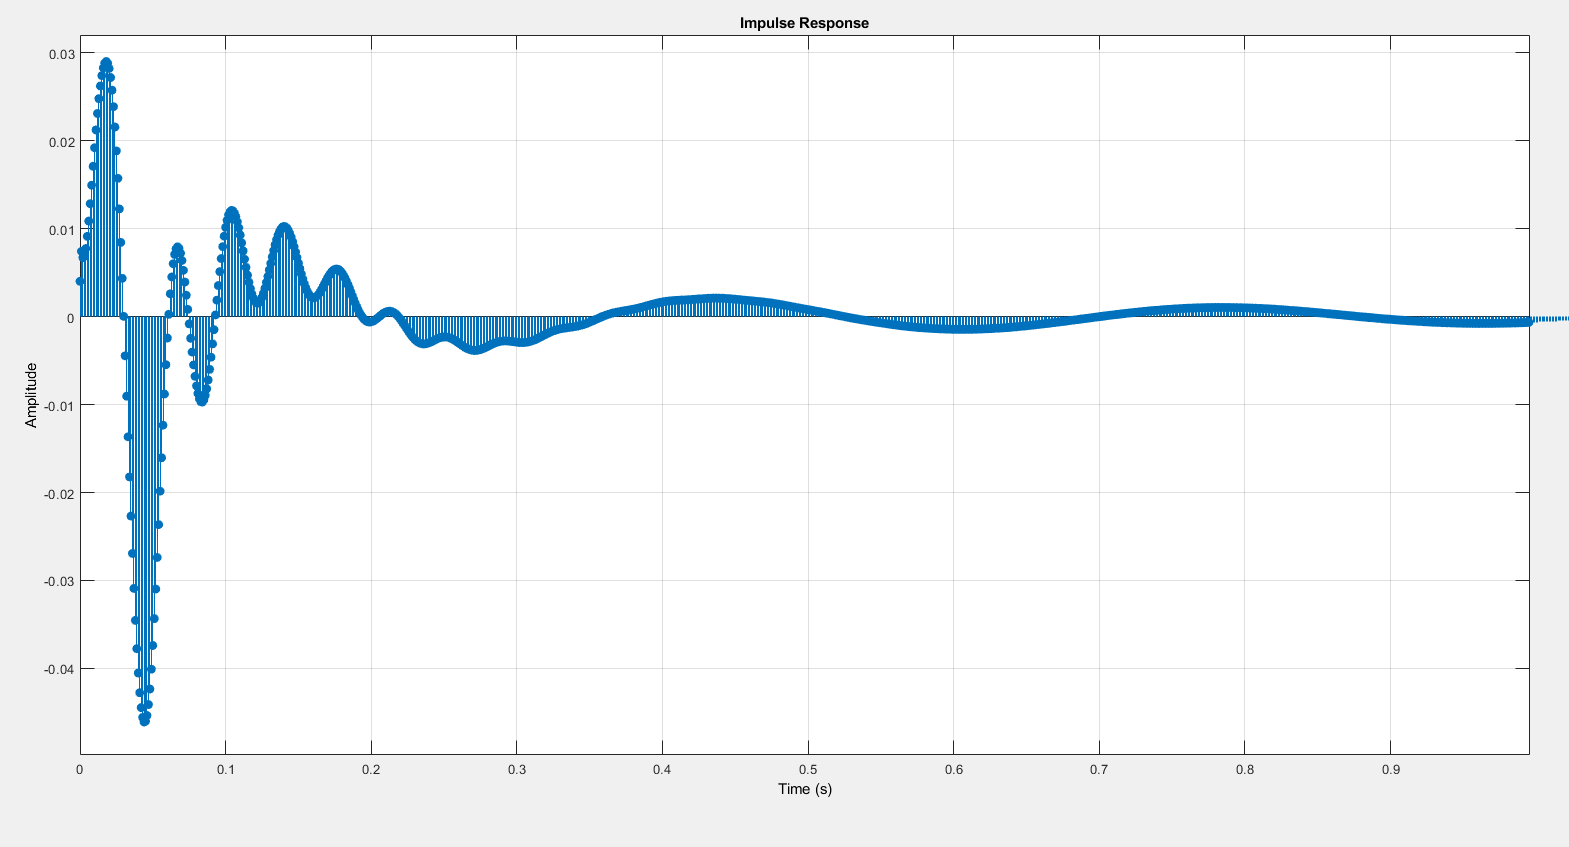
##### Coeficientes: 



### PyFDA

### FIR 
##### Configuracion: 
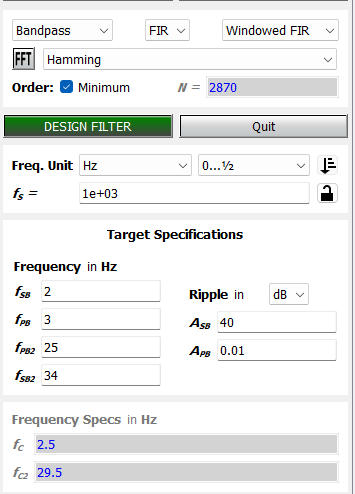
##### Modulo: 
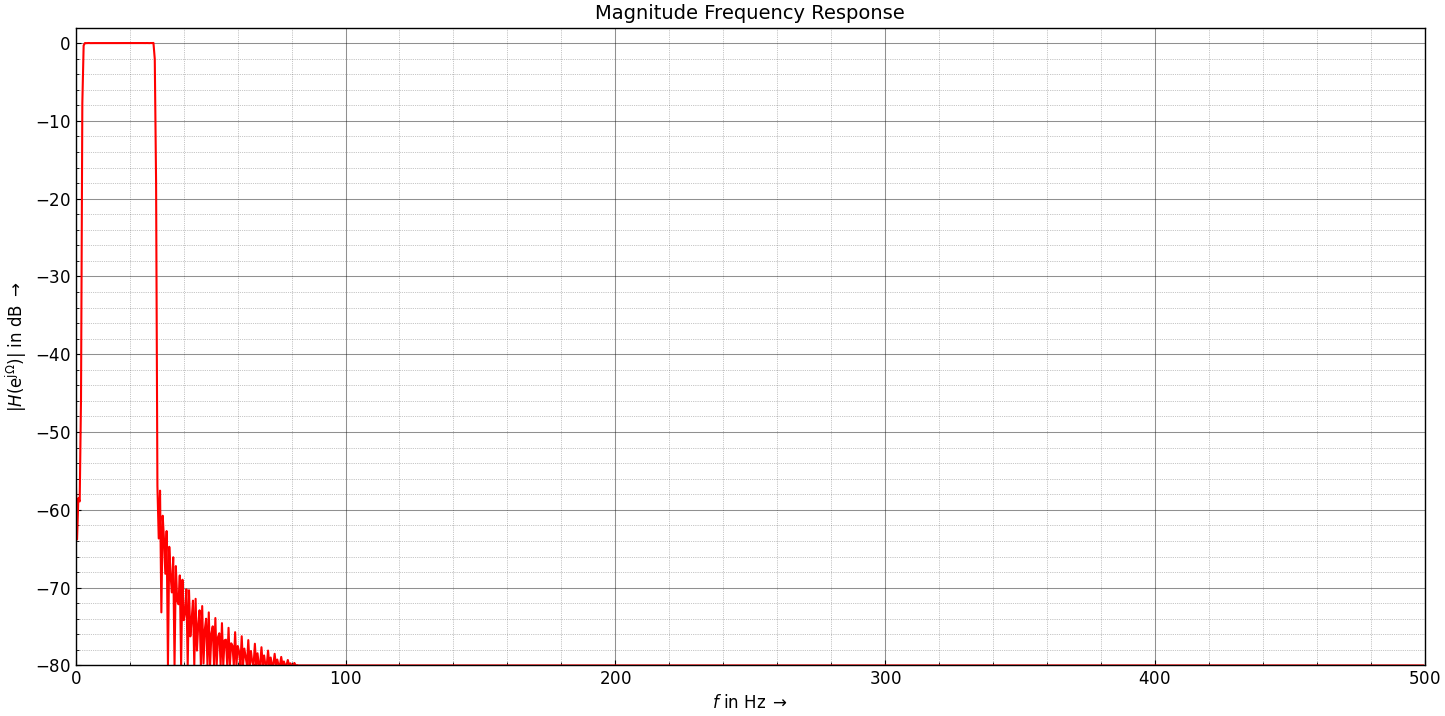
##### Fase: 
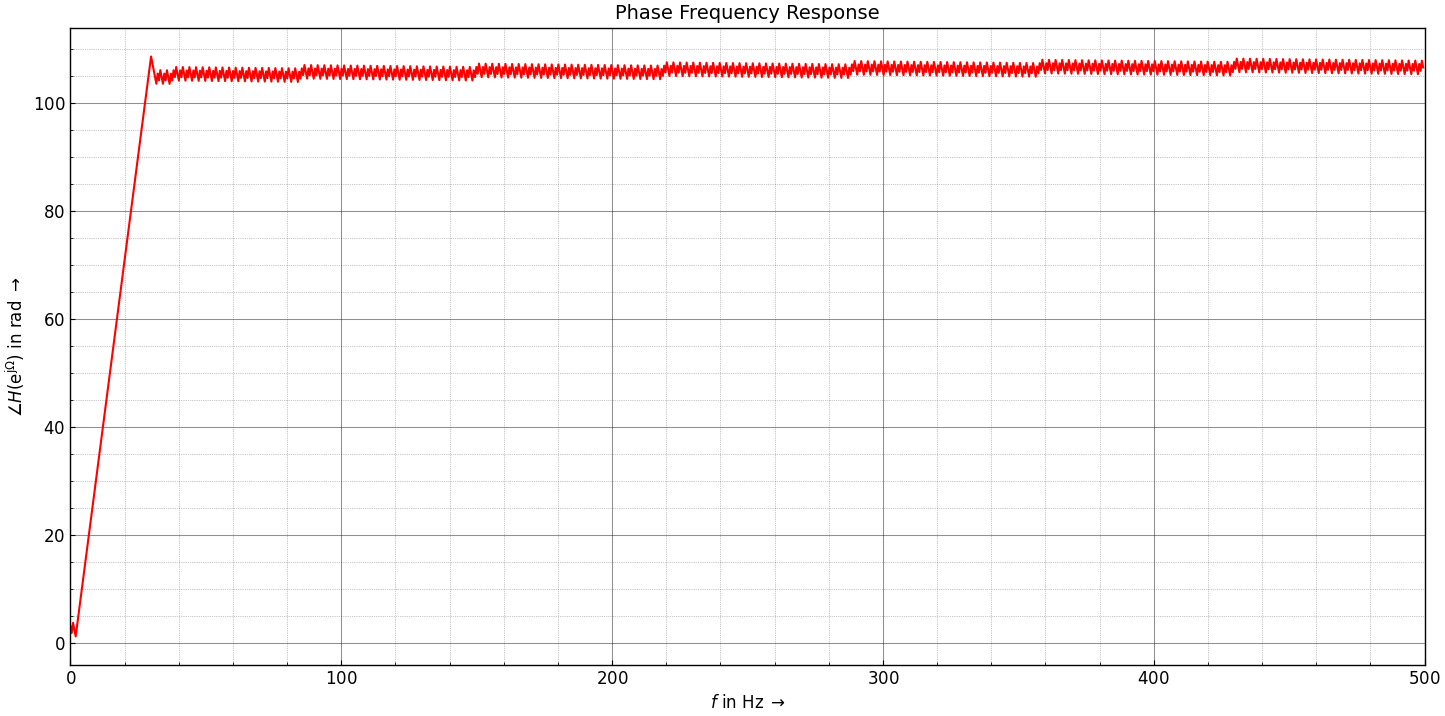
##### Retardo: 
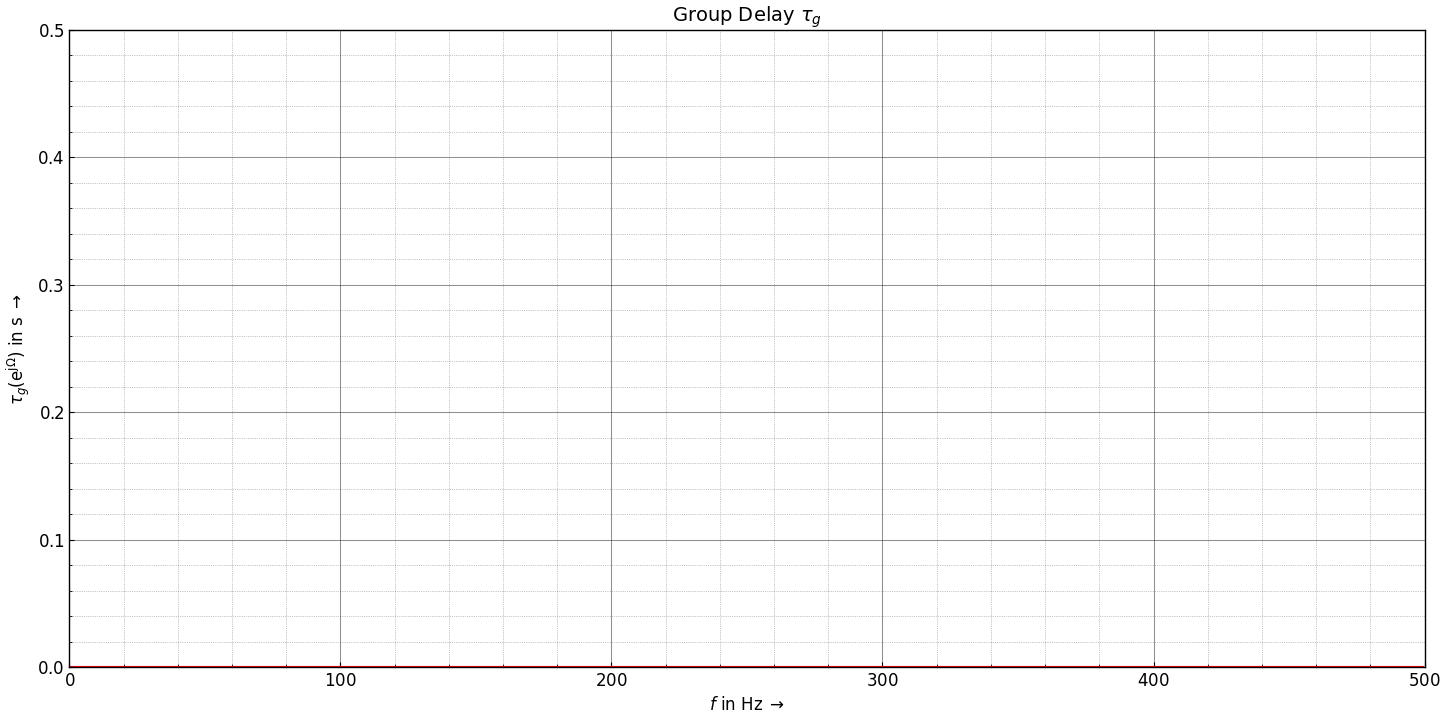
##### Respuesta al impulso: 
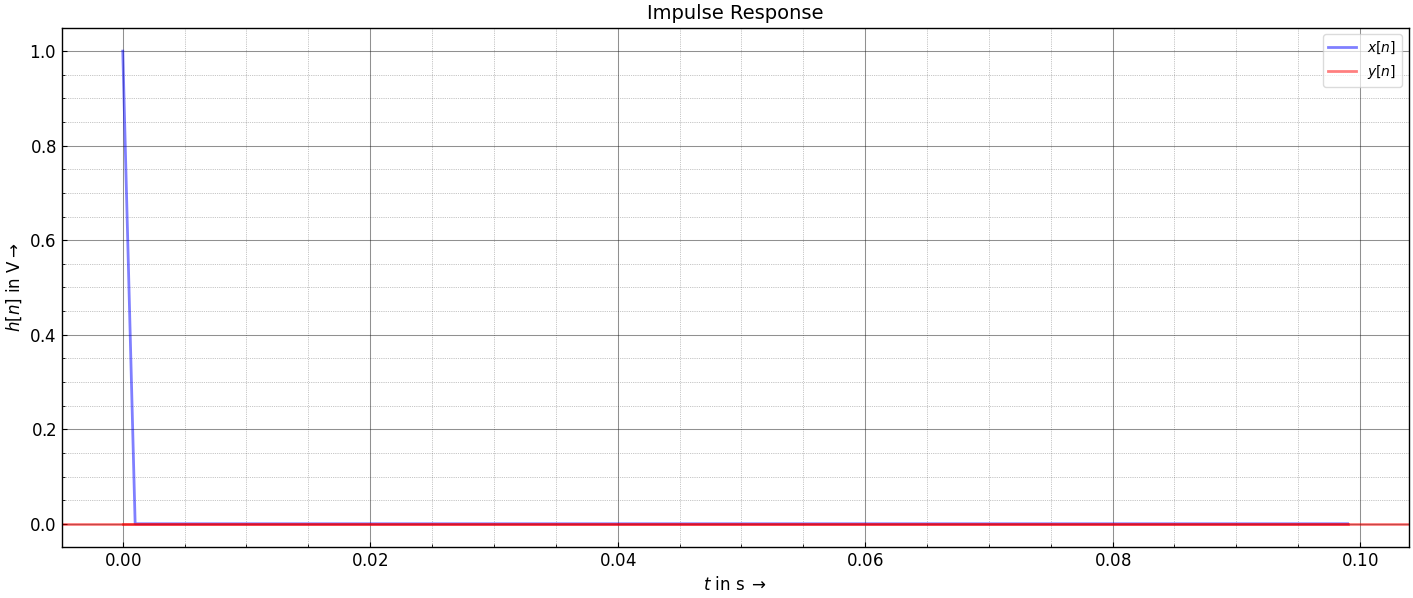



### IIR 
##### Configuracion: 
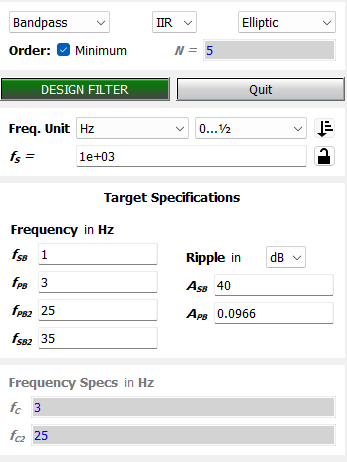
##### Modulo: 
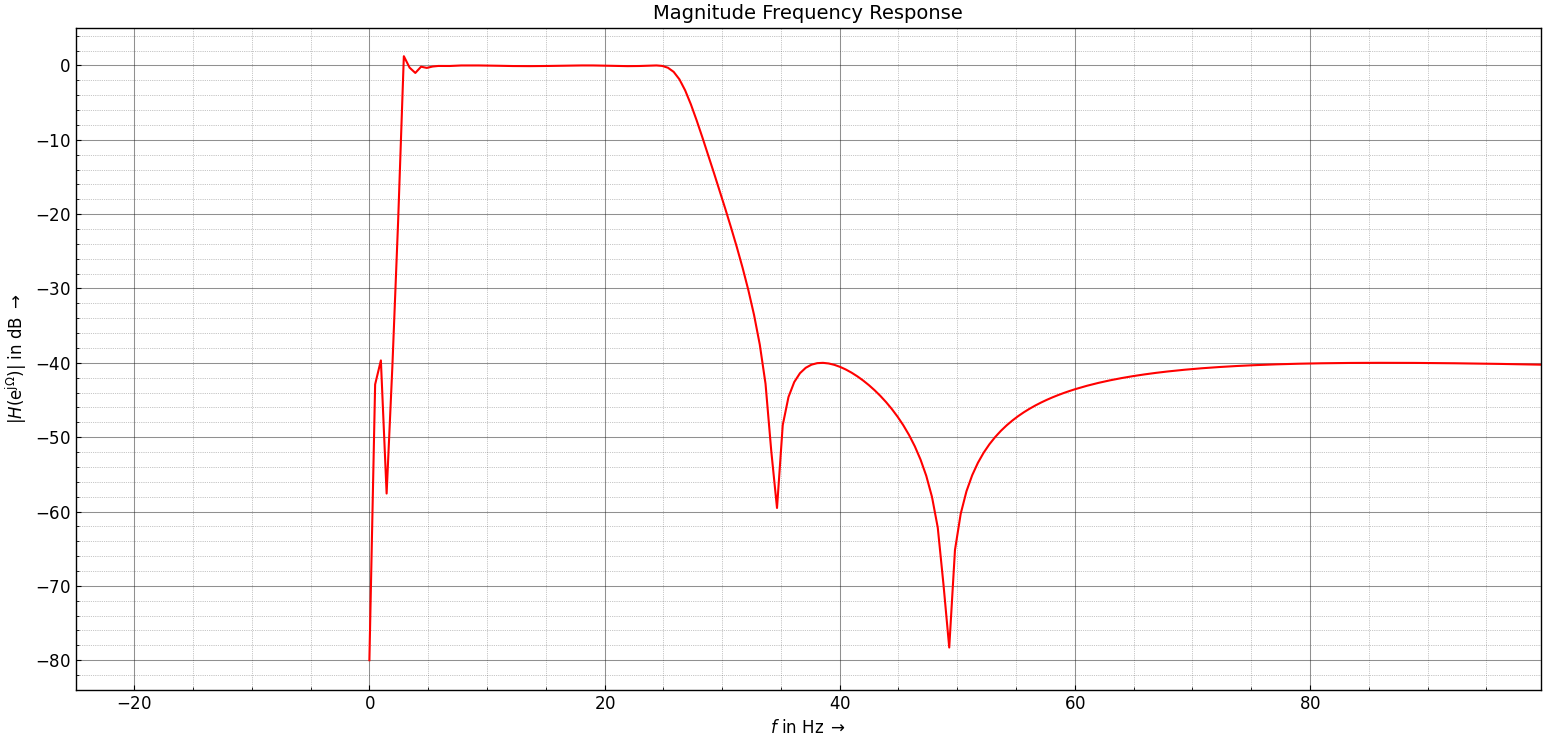
##### Fase: 
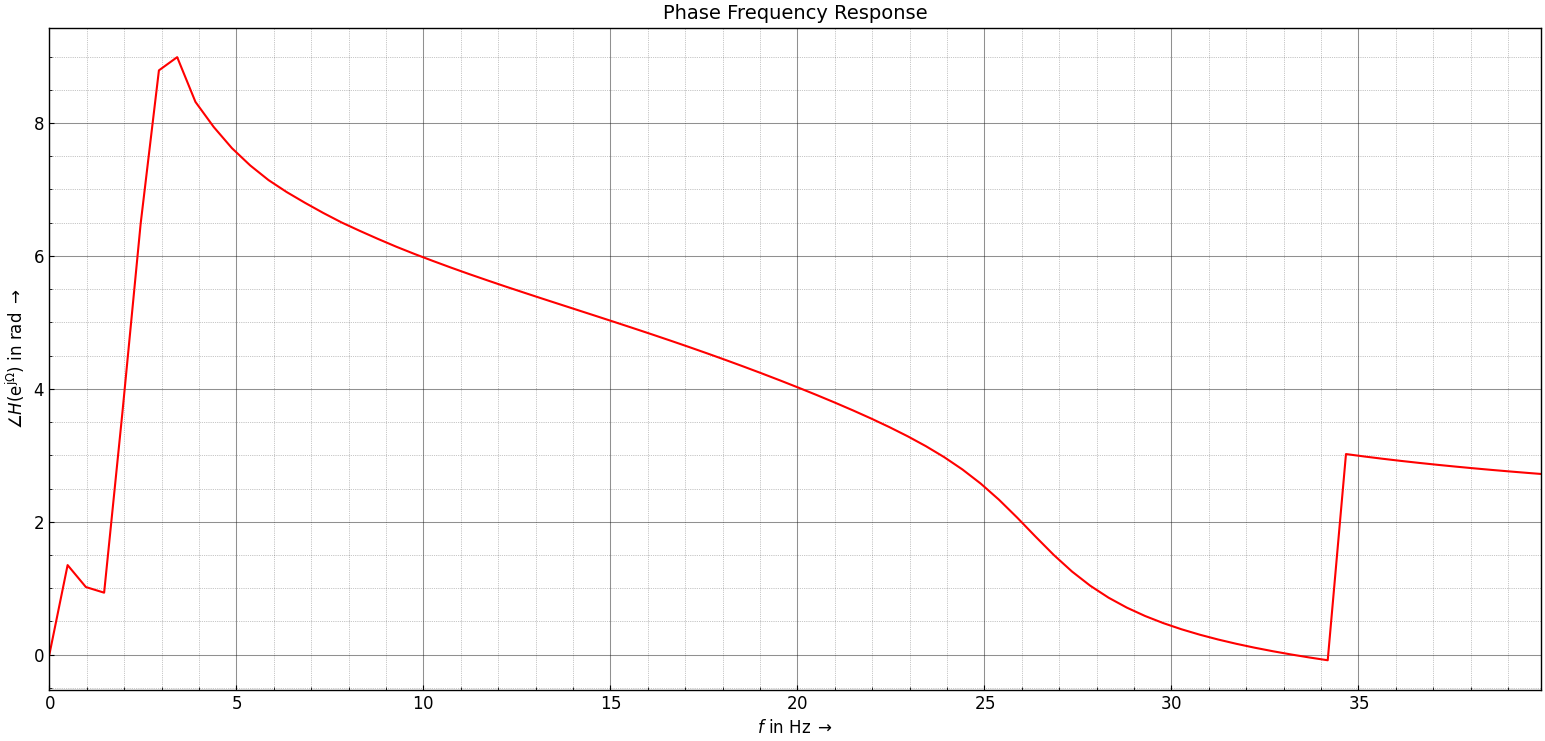
##### Retardo: 
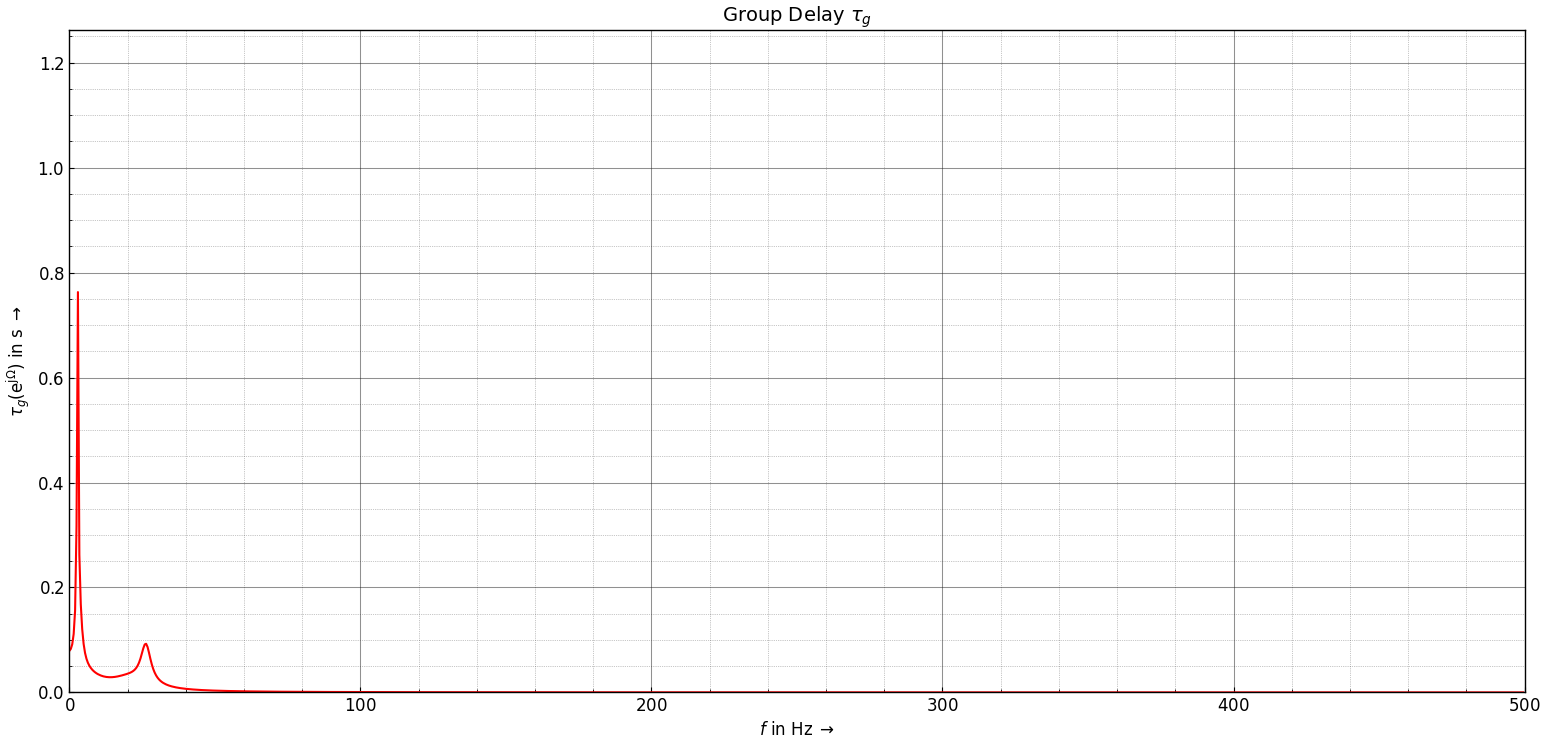
##### Respuesta al impulso: 
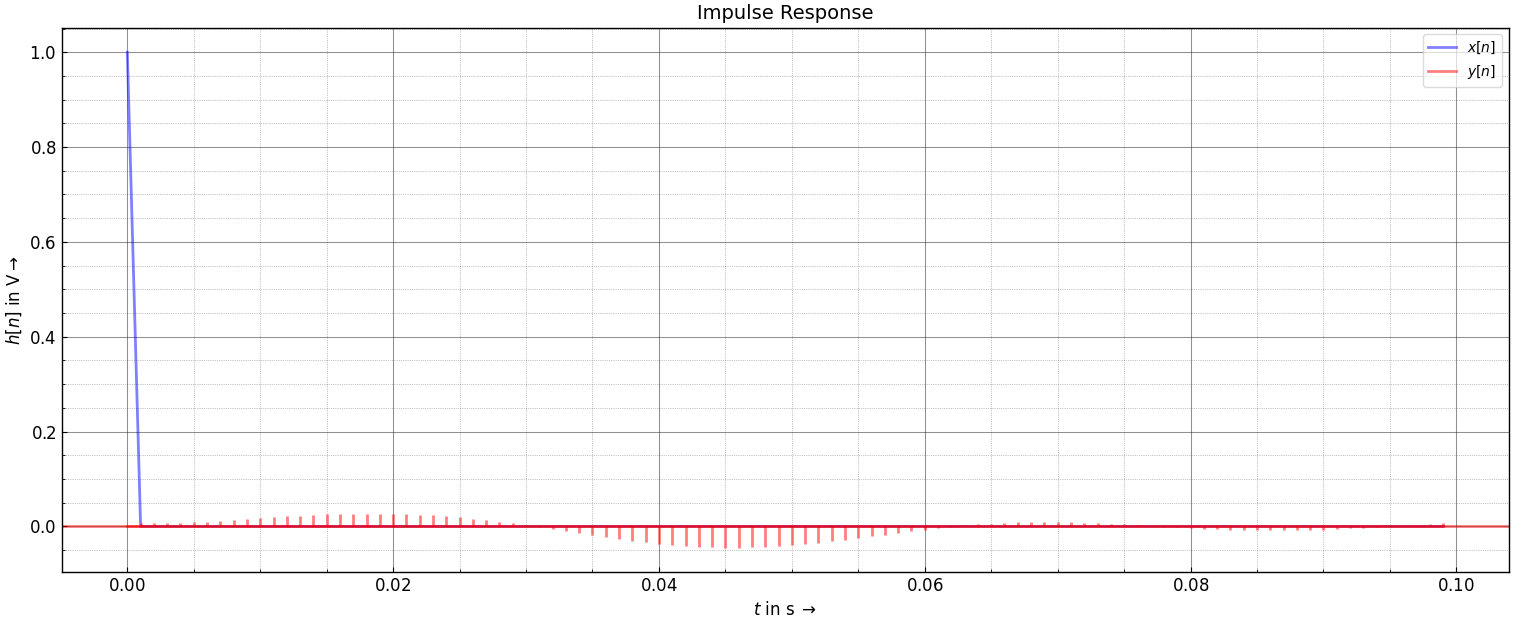
##### Coeficientes: 
##### b: 
0.003807629	-0.029920941	0.099582486	-0.175273104	0.15244437	2.08E-17	-0.15244437	0.175273104	-0.099582486	0.029920941	-0.003807629
##### a: 
1	-9.722784448	42.58028412	-110.611273	188.7460944	-221.0648196	179.9781922	-100.5739231	36.91841361	-8.038597177	0.788412969



## Diseño e implementacion de los filtros con Python

Primero diseño el filtro IIR con iirdesing de scipy.signal, y planteo una aproximacion de Cauer ya que resulta la de menor orden. Tambien cabe aclarar que utilizo la salida en secciones de segundo orden (SOS) para una mejor implementacion en el filtrado. 

In [83]:
# Inicialización e importación de módulos

# Módulos para Jupyter
import warnings
warnings.filterwarnings('ignore')

# Módulos importantantes
import scipy.signal as sig
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io as sio
from splane import plot_plantilla
from pylab import *

def impz(b,a,c,d):
    l = len(b)
    impulse = repeat(0.,l); impulse[0] =1.
    x = arange(0,l)
    response = sig.lfilter(b,a,impulse)
    subplot(211)
    stem(x, response)
    xlim([c,d])
    ylabel('Amplitude')
    xlabel(r'n (samples)')
    title(r'Impulse response')


fig_sz_x = 10
fig_sz_y = 7
fig_dpi = 100 # dpi

fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x,fig_sz_y)
plt.rcParams.update({'font.size':fig_font_size})

###
## Señal de ECG registrada a 1 kHz, con contaminación de diversos orígenes.
###

# para listar las variables que hay en el archivo
#io.whosmat('ecg.mat')
mat_struct = sio.loadmat('ecg.mat')

ecg_one_lead = mat_struct['ecg_lead']
ecg_one_lead = ecg_one_lead.flatten()
cant_muestras = len(ecg_one_lead)

fs = 1000 # Hz
nyq_frec = fs / 2
# Plantilla

# filter design
ripple = 0 # dB
atenuacion = 40 # dB

ws1 = 1.0 #Hz
wp1 = 3.0 #Hz
wp2 = 25.0 #Hz
ws2 = 35.0 #Hz

frecs = np.array([0.0,         ws1,         wp1,     wp2,     ws2,         nyq_frec   ]) / nyq_frec
gains = np.array([-atenuacion, -atenuacion, -ripple, -ripple, -atenuacion, -atenuacion])
gains = 10**(gains/20)


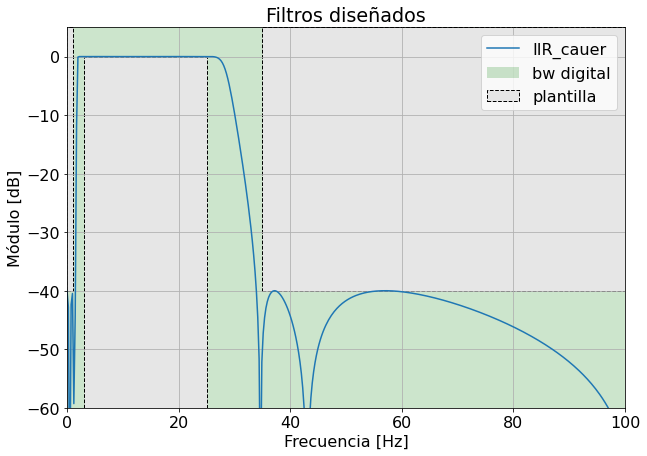

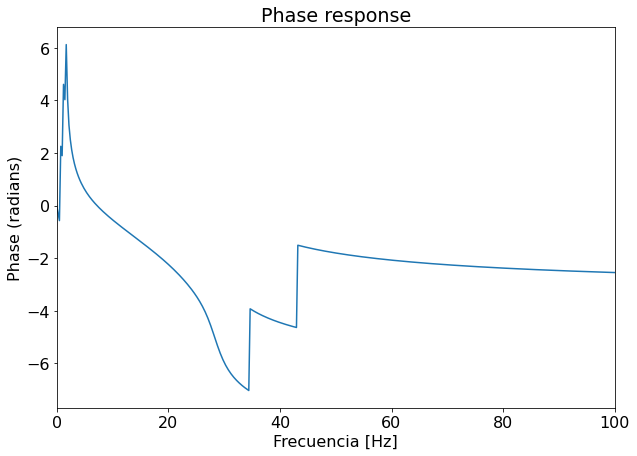

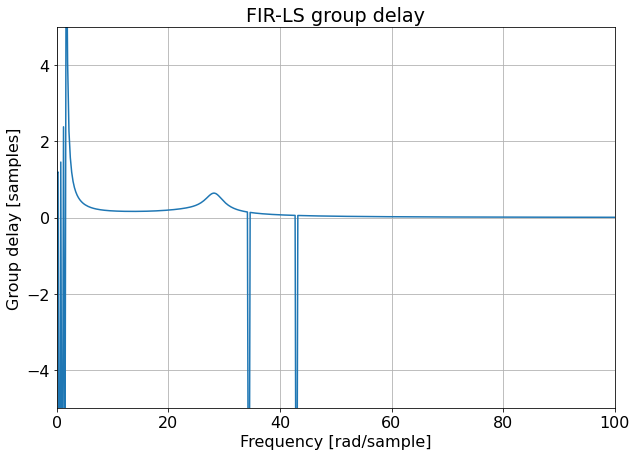

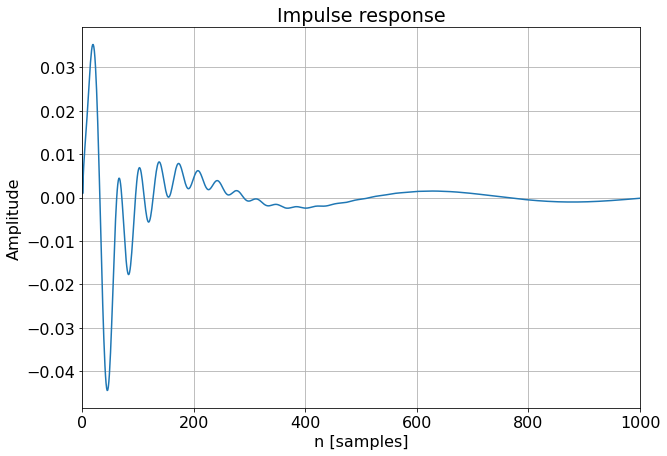

In [84]:
# Design IIR CAUER



iir_sos_cauer = sig.iirdesign(wp=np.array([wp1-1, wp2+1]) / nyq_frec, ws=np.array([ws1, ws2]) / nyq_frec, gpass=0.01, gstop=40., analog=False, ftype='ellip', output='sos')

w_cauer,h=sig.sosfreqz(iir_sos_cauer, worN=2048)
a,b=sig.sos2tf(iir_sos_cauer)
# renormalizo el eje de frecuencia
w_cauer = w_cauer / np.pi * nyq_frec

plt.plot(w_cauer, 20 * np.log10(abs(h)), label='IIR_cauer')

plt.title('Filtros diseñados')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.grid()
plt.axis([0, 100, -60, 5 ]);

axes_hdl = plt.gca()
axes_hdl.legend()

plot_plantilla(filter_type = 'bandpass', fpass = frecs[[2, 3]]* nyq_frec, ripple = ripple , fstop = frecs[ [1, 4] ]* nyq_frec, attenuation = atenuacion, fs = fs)

plt.figure(2)
h_Phase = np.unwrap(arctan2(imag(h),real(h)))
plt.plot(w_cauer,h_Phase)
plt.ylabel('Phase (radians)')
plt.xlabel('Frecuencia [Hz]')
plt.title(r'Phase response')
plt.xlim([0,100])

plt.figure(3)
gd = -np.diff(h_Phase) / np.diff(w_cauer)
plt.title('FIR-LS group delay')
n = np.arange(len(gd))
plt.plot(w_cauer[:-1], gd)
plt.ylabel('Group delay [samples]')
plt.xlabel('Frequency [rad/sample]')
plt.grid()
plt.xlim([0,100])
plt.ylim([-5,5])
plt.show()


plt.figure(4)
l = len(h)
impulse = repeat(0.,l); impulse[0] =1.
x = arange(0,l)
response = sig.sosfilt(iir_sos_cauer, impulse)
plt.plot(x, response)
plt.ylabel('Amplitude')
plt.xlabel('n [samples]')
plt.title('Impulse response')
plt.grid()
plt.xlim([0,1000])
plt.show()

Vemos que seran 6 secciones de orden 2, por lo tanto tendremos un filtro de orden 12. 

A continuacion continuamos con el filtro FIR: 

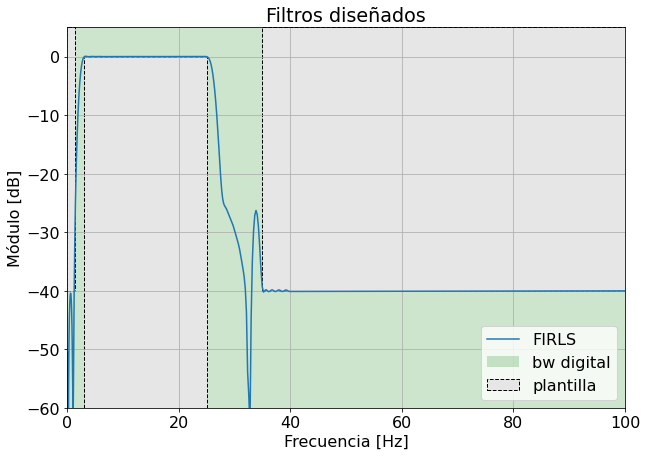

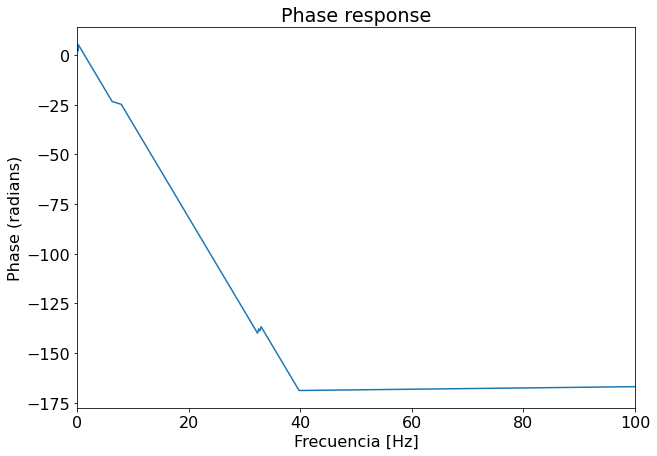

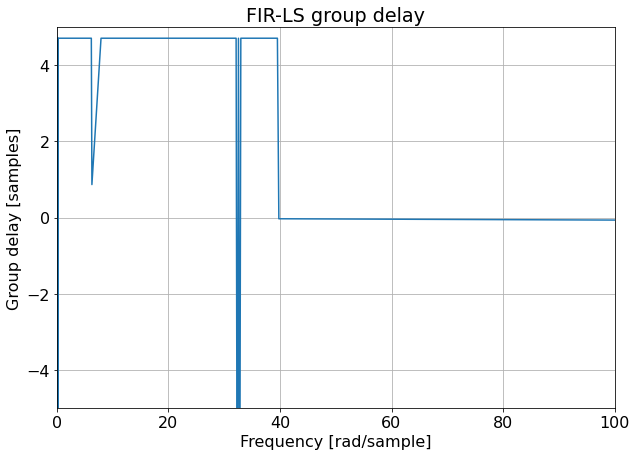

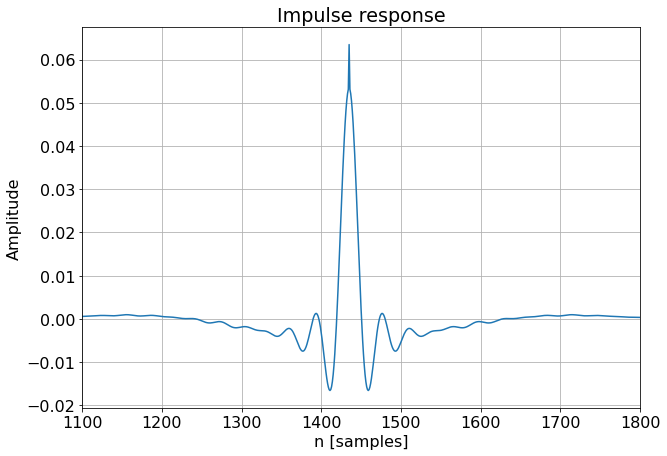

In [85]:
# Design FIR

numtaps = 1501

frecs_ls = np.array([0.0,      ws1+.4,         wp1,     wp2,  28, 32,   ws2,         nyq_frec   ])  / nyq_frec
gains_ls = np.array([-atenuacion*2, -atenuacion, -ripple, -ripple,-25,-40, -atenuacion, -atenuacion])
gains_ls = 10**(gains_ls/20)  

cant_coeficientes = 1501

num_firls = sig.firls(cant_coeficientes, frecs_ls, gains_ls)

den = 1 
# muestreo el filtro donde me interesa verlo según la plantilla.
w  = np.append(np.logspace(-1, 0.8, 250), np.logspace(0.9, 1.6, 250) )
w  = np.append(w, np.linspace(110, nyq_frec, 100, endpoint=True) ) / nyq_frec * np.pi

_, hh_win = sig.freqz(num_firls, den, w)

# renormalizo el eje de frecuencia
w = w / np.pi * nyq_frec

plt.plot(w, 20 * np.log10(abs(hh_win)), label='FIRLS')

plt.title('Filtros diseñados')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.grid()
plt.axis([0, 100, -60, 5 ]);

axes_hdl = plt.gca()
axes_hdl.legend()

plot_plantilla(filter_type = 'bandpass', fpass = frecs[[2, 3]]* nyq_frec, ripple = ripple , fstop = frecs_ls[ [1, 6] ]* nyq_frec, attenuation = atenuacion, fs = fs)

plt.figure(2)
h_Phase = np.unwrap(arctan2(imag(hh_win),real(hh_win)))
plt.plot(w,h_Phase)
plt.ylabel('Phase (radians)')
plt.xlabel('Frecuencia [Hz]')
plt.title(r'Phase response')
plt.xlim([0,100])

plt.figure(3)
gd = -np.diff(h_Phase) / np.diff(w)
plt.title('FIR-LS group delay')
n = np.arange(len(gd))
plt.plot(w[:-1], gd)
plt.ylabel('Group delay [samples]')
plt.xlabel('Frequency [rad/sample]')
plt.grid()
plt.xlim([0,100])
plt.ylim([-5,5])
plt.show()


plt.figure(4)
l = len(num_win)
impulse = repeat(0.,l); impulse[0] =1.
x = arange(0,l)
response = sig.lfilter(num_win, den, impulse)
plt.plot(x, response)
plt.ylabel('Amplitude')
plt.xlabel('n [samples]')
plt.title('Impulse response')
plt.grid()
plt.xlim([1100,1800])
plt.show()

Implemente con firls que utiliza el analisis de los cuadrados minimos, pero no me cierra el realce que se produce en la segunda zona de transicion. 

Por lo tanto hago uso de firwin2 con la aproximacion de hamming, aqui hay varias variantes que se pueden utilizar: 

- Kaiser (aclarando el beta) 
- Blackmann-Harris
- Blackmann 


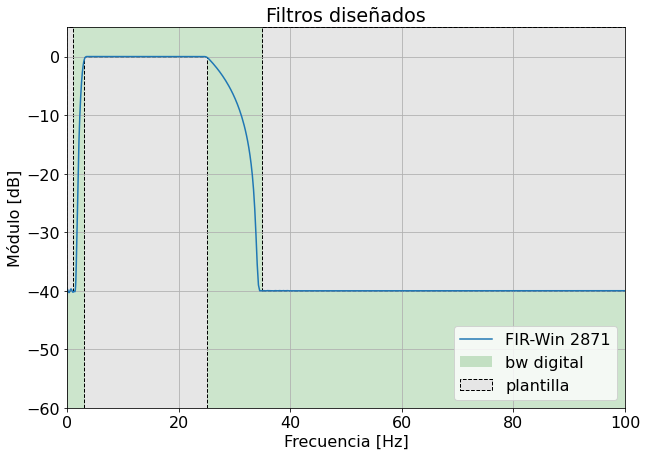

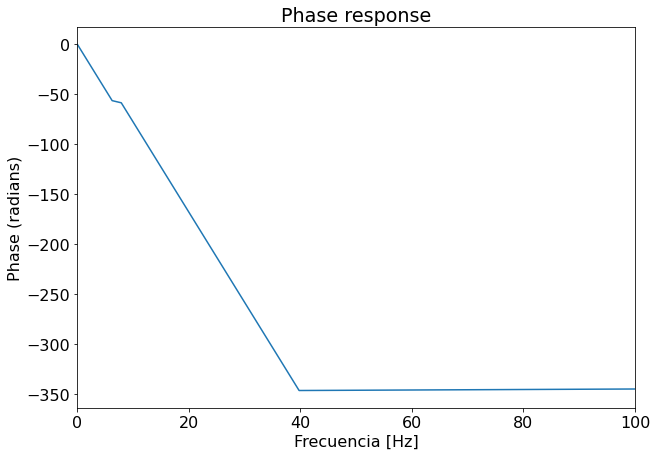

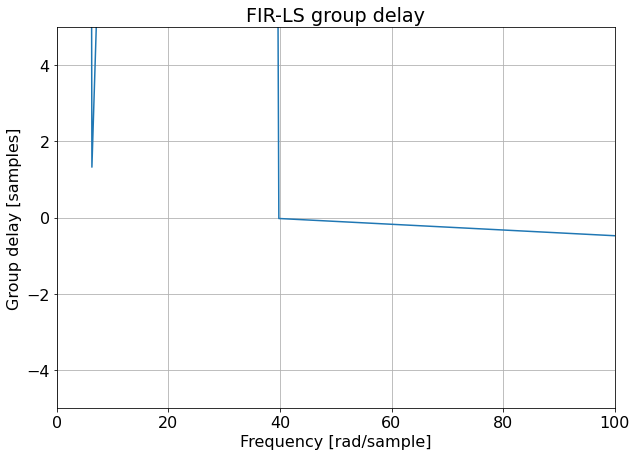

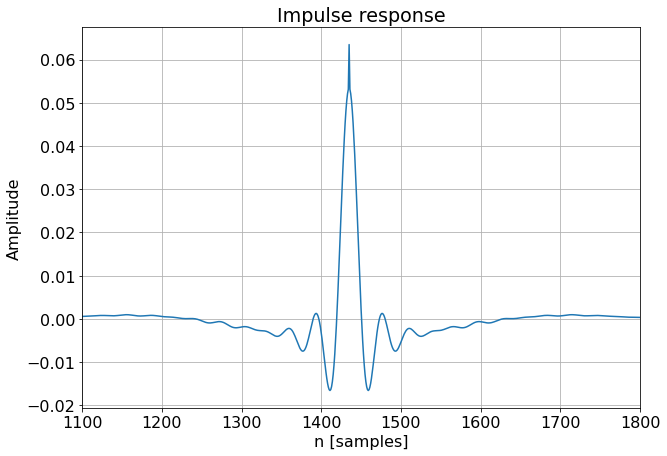

In [86]:
# Diseño con firwin
cant_coeficientes =2871

num_win = sig.firwin2(cant_coeficientes, np.array([0.0,         ws1+1,         wp1,     wp2,     ws2-1,         nyq_frec   ]) / nyq_frec, gains , window='hamming' )

den = 1.0

# muestreo el filtro donde me interesa verlo según la plantilla.
w  = np.append(np.logspace(-1, 0.8, 250), np.logspace(0.9, 1.6, 250) )
w  = np.append(w, np.linspace(110, nyq_frec, 100, endpoint=True) ) / nyq_frec * np.pi

_, hh_win = sig.freqz(num_win, den, w)

# renormalizo el eje de frecuencia
w = w / np.pi * nyq_frec

plt.plot(w, 20 * np.log10(abs(hh_win)), label='FIR-Win {:d}'.format(num_win.shape[0]))

plt.title('Filtros diseñados')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.grid()
plt.axis([0, 100, -60, 5 ]);

axes_hdl = plt.gca()
axes_hdl.legend()

plot_plantilla(filter_type = 'bandpass', fpass = frecs[[2, 3]]* nyq_frec, ripple = ripple , fstop = frecs[ [1, 4] ]* nyq_frec, attenuation = atenuacion, fs = fs)

plt.figure(2)
h_Phase = np.unwrap(arctan2(imag(hh_win),real(hh_win)))
plt.plot(w,h_Phase)
plt.ylabel('Phase (radians)')
plt.xlabel('Frecuencia [Hz]')
plt.title(r'Phase response')
plt.xlim([0,100])

plt.figure(3)
gd = -np.diff(h_Phase) / np.diff(w)
plt.title('FIR-LS group delay')
n = np.arange(len(gd))
plt.plot(w[:-1], gd)
plt.ylabel('Group delay [samples]')
plt.xlabel('Frequency [rad/sample]')
plt.grid()
plt.xlim([0,100])
plt.ylim([-5,5])
plt.show()


plt.figure(4)
l = len(num_win)
impulse = repeat(0.,l); impulse[0] =1.
x = arange(0,l)
response = sig.lfilter(num_win, den, impulse)
plt.plot(x, response)
plt.ylabel('Amplitude')
plt.xlabel('n [samples]')
plt.title('Impulse response')
plt.grid()
plt.xlim([1100,1800])
plt.show()

Me encontre con la necesidad de modificar las frecuencias solicitadas en funcion de cumplir con la plantilla ademas de usar un orden de 2870, para el cual me ayude con el PyFDA para comprobar los puntos criticos. 

A continuacion se realizara el filtrado de la señal ECG propuesta. 

## Parte 2


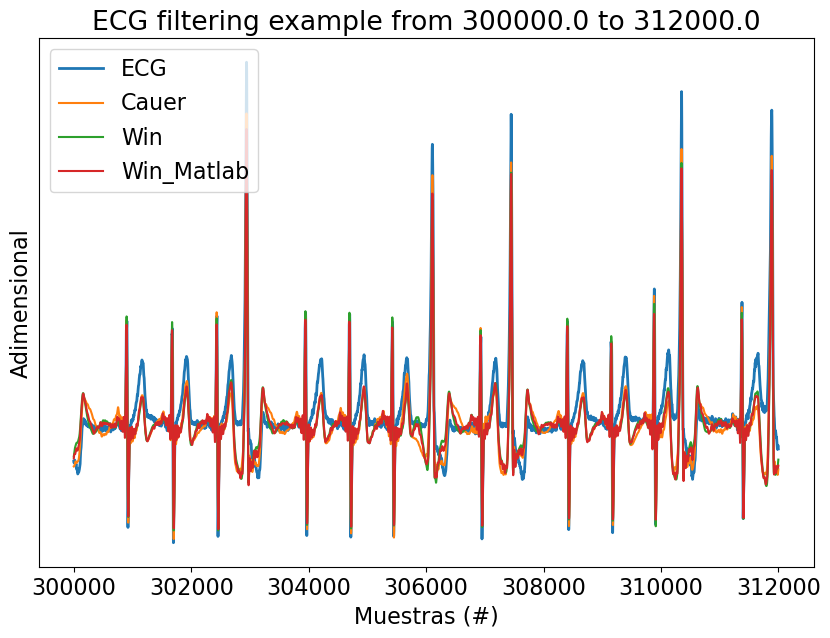

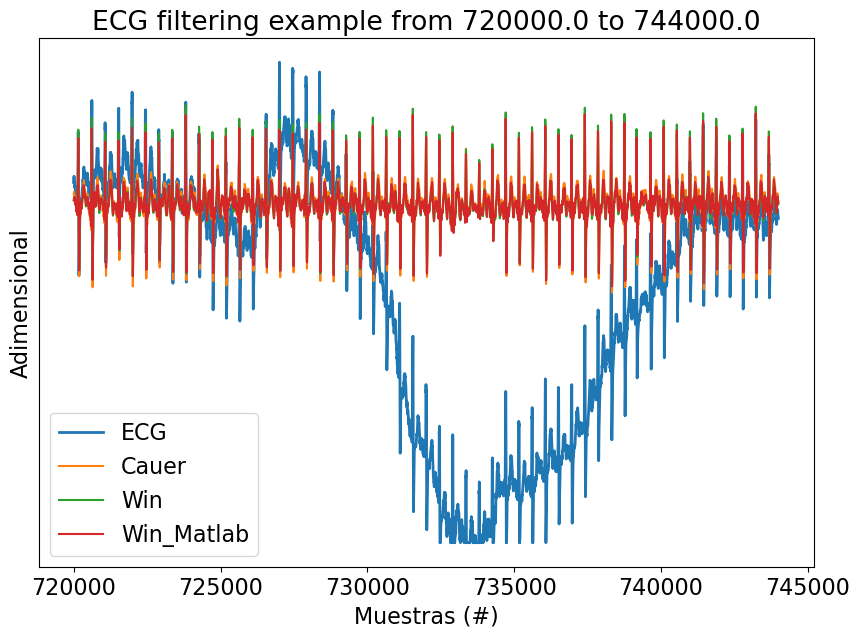

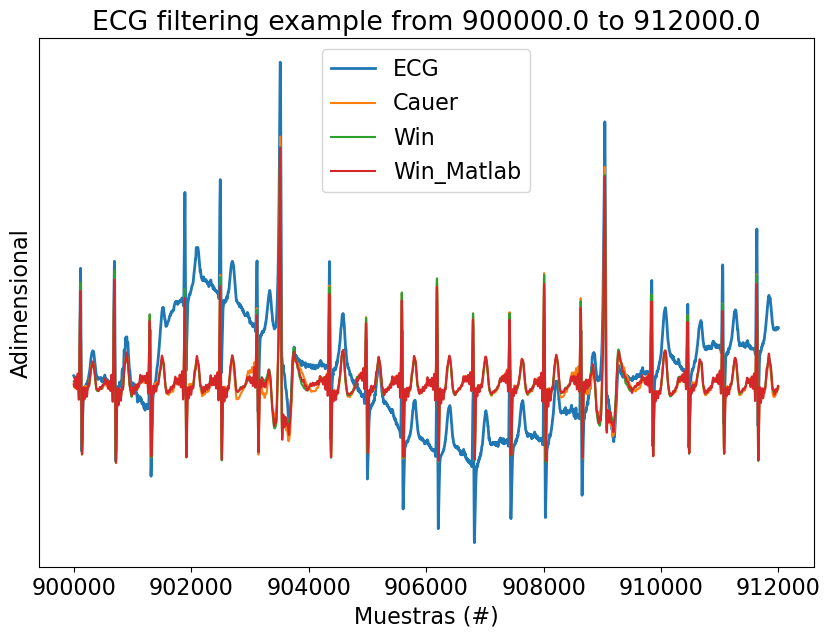

In [87]:
# IIR
ECG_f_cauer = sig.sosfiltfilt(iir_sos_cauer, ecg_one_lead)

## FIR MATLAB 
coeff_loads = sio.loadmat('coefficients.mat')
coeff = coeff_loads['Num']
coeff = coeff.flatten()
cant_muestras_coeff = len(coeff)
ECG_f_win_matlab = sig.lfilter(coeff, 1, ecg_one_lead)
    
    
# FIR
ECG_f_win = sig.lfilter(num_win, den, ecg_one_lead)

# demora = int(...)
# calcule la demora para cada caso, dicha demora adelantará la señal de salida, como puede ver más abajo.
demora = 1435
demora2 = 492 

# Segmentos de interés con ALTA contaminación

regs_interes = ( 
        np.array([5, 5.2]) *60*fs, # minutos a muestras
        np.array([12, 12.4]) *60*fs, # minutos a muestras
        np.array([15, 15.2]) *60*fs, # minutos a muestras
        )

for ii in regs_interes:
    
    # intervalo limitado de 0 a cant_muestras
    zoom_region = np.arange(np.max([0, ii[0]]), np.min([cant_muestras, ii[1]]), dtype='uint')
    
    plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
    plt.plot(zoom_region, ecg_one_lead[zoom_region], label='ECG', linewidth=2)
    plt.plot(zoom_region, ECG_f_cauer[zoom_region], label='Cauer')
    plt.plot(zoom_region, ECG_f_win[zoom_region + demora], label='Win')
    plt.plot(zoom_region, ECG_f_win_matlab[zoom_region + demora2], label='Win_Matlab')  
    plt.title('ECG filtering example from ' + str(ii[0]) + ' to ' + str(ii[1]) )
    plt.ylabel('Adimensional')
    plt.xlabel('Muestras (#)')
    
    axes_hdl = plt.gca()
    axes_hdl.legend()
    axes_hdl.set_yticks(())
            
    plt.show()

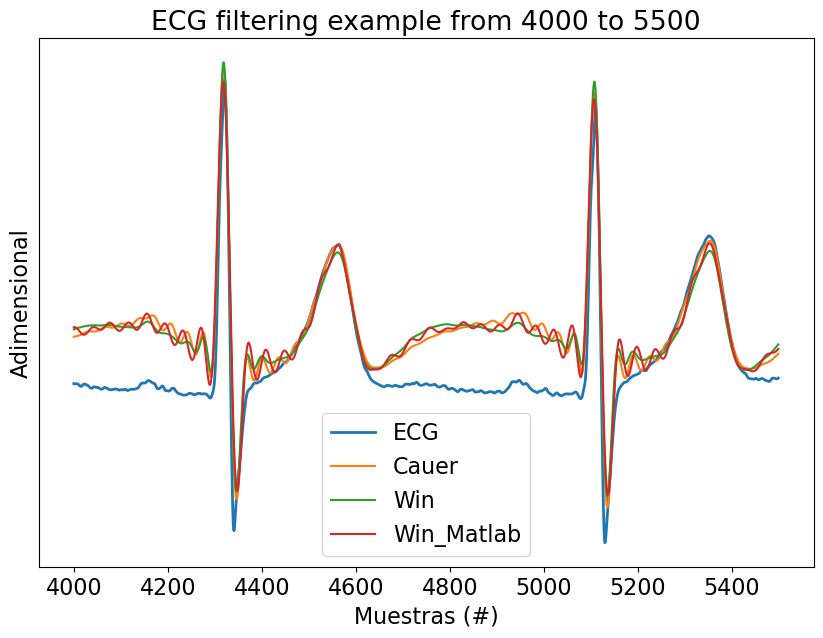

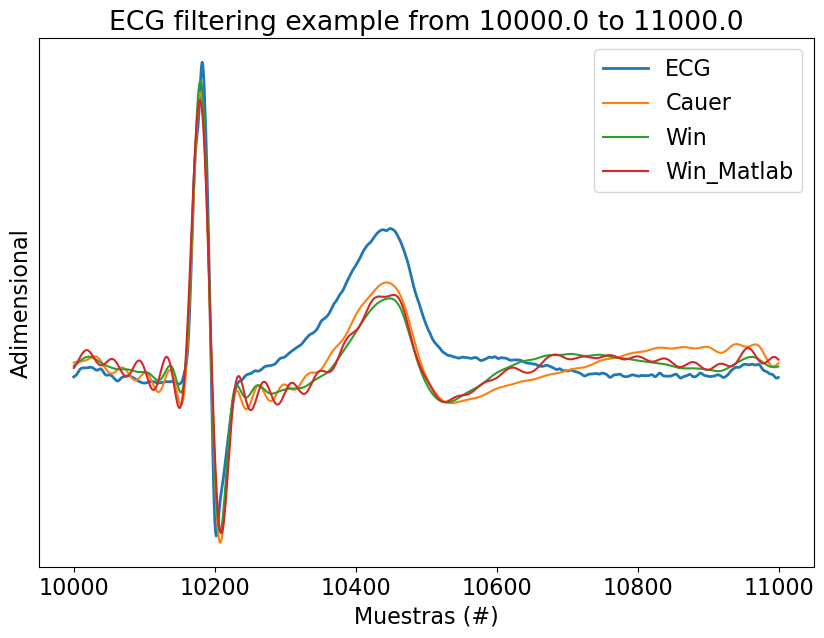

In [88]:
regs_interes = ( 
        [4000, 5500], # muestras
        [10e3, 11e3], # muestras
        )

for ii in regs_interes:
    
    # intervalo limitado de 0 a cant_muestras
    zoom_region = np.arange(np.max([0, ii[0]]), np.min([cant_muestras, ii[1]]), dtype='uint')
    
    plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
    plt.plot(zoom_region, ecg_one_lead[zoom_region], label='ECG', linewidth=2)
    plt.plot(zoom_region, ECG_f_cauer[zoom_region], label='Cauer')
    plt.plot(zoom_region, ECG_f_win[zoom_region + demora], label='Win')
    plt.plot(zoom_region, ECG_f_win_matlab[zoom_region + demora2], label='Win_Matlab')  
    plt.title('ECG filtering example from ' + str(ii[0]) + ' to ' + str(ii[1]) )
    plt.ylabel('Adimensional')
    plt.xlabel('Muestras (#)')
    
    axes_hdl = plt.gca()
    axes_hdl.legend()
    axes_hdl.set_yticks(())
            
    plt.show()

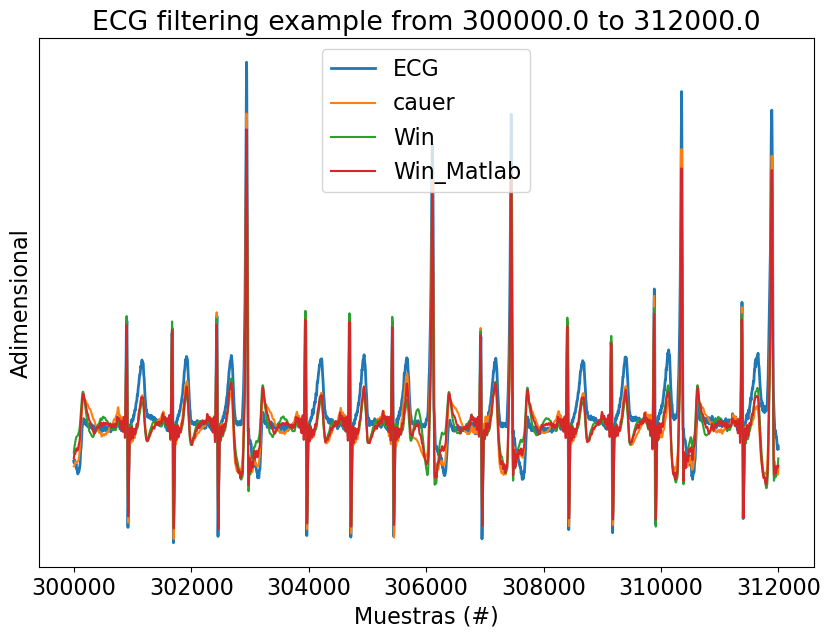

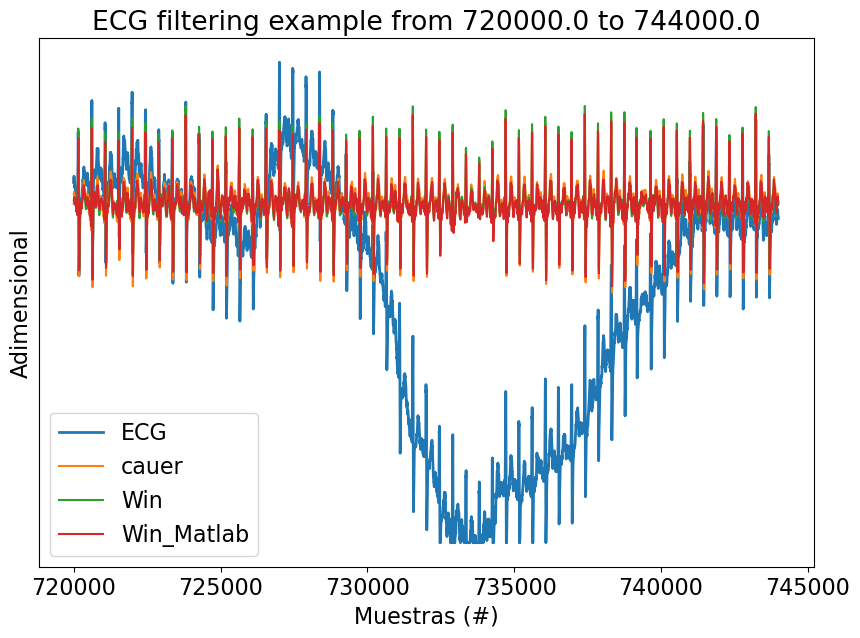

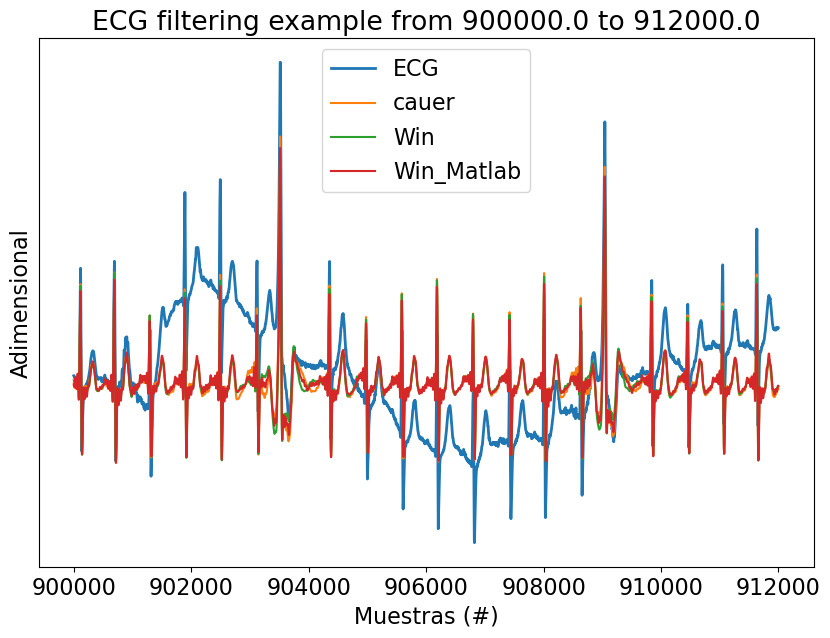

In [89]:
# Procedemos al filtrado
# ECG_f_butt = sig.sosfiltfilt(bp_sos_butter, ecg_one_lead)

ECG_f_win = sig.filtfilt(num_win, den, ecg_one_lead)

# Segmentos de interés
regs_interes = ( 
        np.array([5, 5.2]) *60*fs, # minutos a muestras
        np.array([12, 12.4]) *60*fs, # minutos a muestras
        np.array([15, 15.2]) *60*fs, # minutos a muestras
        )

for ii in regs_interes:
    
    # intervalo limitado de 0 a cant_muestras
    zoom_region = np.arange(np.max([0, ii[0]]), np.min([cant_muestras, ii[1]]), dtype='uint')
    
    plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
    plt.plot(zoom_region, ecg_one_lead[zoom_region], label='ECG', lw=2)
    plt.plot(zoom_region, ECG_f_cauer[zoom_region], label='cauer')
    plt.plot(zoom_region, ECG_f_win[zoom_region], label='Win')
    plt.plot(zoom_region, ECG_f_win_matlab[zoom_region + demora2], label='Win_Matlab')  
    plt.title('ECG filtering example from ' + str(ii[0]) + ' to ' + str(ii[1]) )
    plt.ylabel('Adimensional')
    plt.xlabel('Muestras (#)')
    
    axes_hdl = plt.gca()
    axes_hdl.legend()
    axes_hdl.set_yticks(())
            
    plt.show()

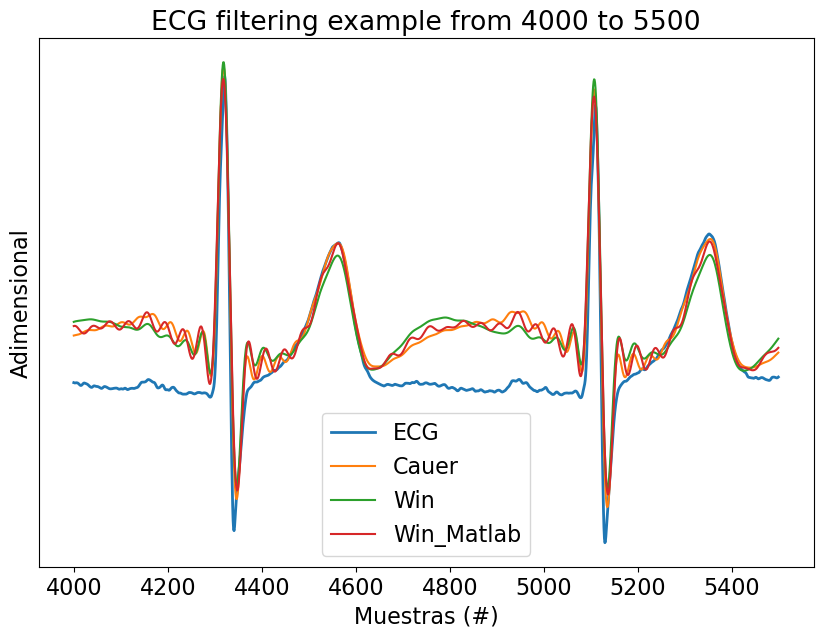

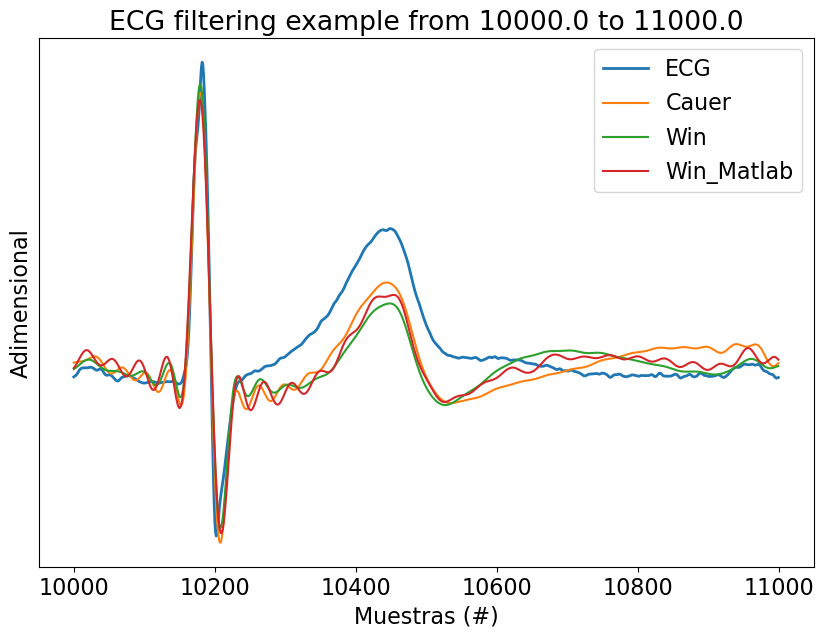

In [90]:
regs_interes = ( 
        [4000, 5500], # muestras
        [10e3, 11e3], # muestras
        )

for ii in regs_interes:
    
    # intervalo limitado de 0 a cant_muestras
    zoom_region = np.arange(np.max([0, ii[0]]), np.min([cant_muestras, ii[1]]), dtype='uint')
    
    plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
    plt.plot(zoom_region, ecg_one_lead[zoom_region], label='ECG', lw=2)
    plt.plot(zoom_region, ECG_f_cauer[zoom_region], label='Cauer')
    plt.plot(zoom_region, ECG_f_win[zoom_region], label='Win')
    plt.plot(zoom_region, ECG_f_win_matlab[zoom_region + demora2], label='Win_Matlab') 
    plt.title('ECG filtering example from ' + str(ii[0]) + ' to ' + str(ii[1]) )
    plt.ylabel('Adimensional')
    plt.xlabel('Muestras (#)')
    
    axes_hdl = plt.gca()
    axes_hdl.legend()
    axes_hdl.set_yticks(())
            
    plt.show()

## Conclusiones 

Como podemos observar todos los filtros cumplen la plantilla pero no responden bien en la practica, ya que van a perjudicar el estudio de la señal modificando puntos criticos a estudiar. 